In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from datetime import timedelta



In [2]:
df_calen = pd.read_csv('../data/calendar.csv')
df_val = pd.read_csv('../data/sales_train_validation.csv')
df_eval = pd.read_csv('../data/sales_train_evaluation.csv')
df_price = pd.read_csv('../data/sell_prices.csv')


In [3]:
df_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
df_eval.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
df_eval['cat_id'].unique(), df_val['cat_id'].unique() 

(array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object),
 array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object))

In [6]:

df_eval[df_eval['cat_id'] == 'FOODS'].head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
1612,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,2,3,1,0,0,0,1,0,0,0
1613,FOODS_1_002_CA_1_evaluation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,1,0,1,...,2,1,0,1,1,1,0,1,1,2
1614,FOODS_1_003_CA_1_evaluation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,2,0,0,0,0,0,2,2,0,1
1615,FOODS_1_004_CA_1_evaluation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,5,6,2,5,1,2,1,1,3,4
1616,FOODS_1_005_CA_1_evaluation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,9,3,3,...,2,1,11,0,0,0,0,0,0,1


In [7]:
df_eval['id']
# df_eval['id'].str.split('_',expand=True).drop(columns=5).T.apply(('_').join).unique()[0]


0        HOBBIES_1_001_CA_1_evaluation
1        HOBBIES_1_002_CA_1_evaluation
2        HOBBIES_1_003_CA_1_evaluation
3        HOBBIES_1_004_CA_1_evaluation
4        HOBBIES_1_005_CA_1_evaluation
                     ...              
30485      FOODS_3_823_WI_3_evaluation
30486      FOODS_3_824_WI_3_evaluation
30487      FOODS_3_825_WI_3_evaluation
30488      FOODS_3_826_WI_3_evaluation
30489      FOODS_3_827_WI_3_evaluation
Name: id, Length: 30490, dtype: object

In [8]:
df_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [10]:

def set_historic(df, idx, df_calen=df_calen, df_price=df_price):
    # # display(df)
    # idx = df['id'].str.split('_',expand=True).drop(columns=5).T.apply(('_').join).unique()[0]
    idx = ('_').join(idx.split('_')[:-1])

    # print(idx)

    df_fore_1 = df[df['id'].str.contains(idx)].melt(id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'])
    df_cal_fore = pd.merge(df_fore_1[['id','store_id','item_id','variable','value']], df_calen, left_on='variable', right_on='d')
    df_cal_fore['date'] = pd.to_datetime(df_cal_fore['date'])
    df_month = df_cal_fore.groupby([pd.Grouper(key='date', freq='ME'),'year','month']).agg({'value':'sum',}).reset_index()
    df_cal_fore_full = pd.merge(df_cal_fore, df_month.drop('date', axis=1), on=['year','month'], suffixes=('','_month'))
    df_full = pd.merge(df_cal_fore_full, df_price, on=['store_id','item_id','wm_yr_wk'])
    df_full['sales'] = df_full['value_month']*df_full['sell_price']
    df_full['date_month'] = df_full['date'].dt.strftime('%Y-%m')
    df_full['date_month'] = pd.to_datetime(df_full['date_month']) 

    df_full['idx'] = idx
        
    return df_full

In [11]:
idx = df_val['id'].unique()[15] # 2, 15
# idx = 'FOODS_1_004_CA_1_evaluation'


In [12]:
df_full_eval = set_historic(df_eval, idx)

In [13]:
df_full_val = set_historic(df_val, idx)

In [14]:
df_full_val.drop_duplicates().head()

,id,store_id,item_id,variable,value,date,wm_yr_wk,weekday,wday,month,...,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,value_month,sell_price,sales,date_month,idx
0,HOBBIES_1_016_CA_1_validation,CA_1,HOBBIES_1_016,d_1,5,2011-01-29,11101,Saturday,1,1,...,NaN,NaN,0,0,0,9,0.7,6.3,2011-01-01,HOBBIES_1_016_CA_1
1,HOBBIES_1_016_CA_1_validation,CA_1,HOBBIES_1_016,d_2,1,2011-01-30,11101,Sunday,2,1,...,NaN,NaN,0,0,0,9,0.7,6.3,2011-01-01,HOBBIES_1_016_CA_1
2,HOBBIES_1_016_CA_1_validation,CA_1,HOBBIES_1_016,d_3,3,2011-01-31,11101,Monday,3,1,...,NaN,NaN,0,0,0,9,0.7,6.3,2011-01-01,HOBBIES_1_016_CA_1
3,HOBBIES_1_016_CA_1_validation,CA_1,HOBBIES_1_016,d_4,0,2011-02-01,11101,Tuesday,4,2,...,NaN,NaN,1,1,0,178,0.7,124.6,2011-02-01,HOBBIES_1_016_CA_1
4,HOBBIES_1_016_CA_1_validation,CA_1,HOBBIES_1_016,d_5,15,2011-02-02,11101,Wednesday,5,2,...,NaN,NaN,1,0,1,178,0.7,124.6,2011-02-01,HOBBIES_1_016_CA_1


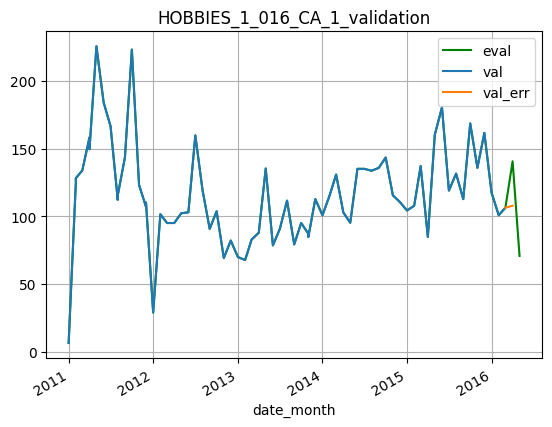

In [15]:
ax = df_full_eval.loc[:,['date_month','sales']].drop_duplicates().set_index('date_month').sort_index().plot(color='g', label='eval')
df_full_val.loc[:,['date_month','sales']].drop_duplicates()[:-1].set_index('date_month').sort_index().plot(ax=ax, label='val')
df_full_val.loc[:,['date_month','sales']].drop_duplicates()[-2:].set_index('date_month').sort_index().plot(ax=ax, label='val_err')

ax.legend(['eval','val','val_err'])
ax.set_title(idx)
plt.grid()
# sns.lineplot(data=df_full[['date_month','sales']].drop_duplicates(), x='date_month', y='sales')

In [16]:
sales_val = df_full_val.loc[:,['id','date_month','sales']].drop_duplicates()
sales_val['date_month'] = sales_val['date_month'].dt.strftime("%Y-%m")
sales_val['date_month'] = pd.to_datetime(sales_val['date_month'])

sales_eval = df_full_eval.loc[:,['id','date_month','sales']].drop_duplicates()
sales_eval['date_month'] = sales_eval['date_month'].dt.strftime("%Y-%m")
sales_eval['date_month'] = pd.to_datetime(sales_eval['date_month'])

In [18]:
sales_val

,id,date_month,sales
0,HOBBIES_1_016_CA_1_validation,2011-01-01,6.30
3,HOBBIES_1_016_CA_1_validation,2011-02-01,124.60
21,HOBBIES_1_016_CA_1_validation,2011-02-01,128.16
31,HOBBIES_1_016_CA_1_validation,2011-03-01,133.92
62,HOBBIES_1_016_CA_1_validation,2011-04-01,158.40
...,...,...,...
1767,HOBBIES_1_016_CA_1_validation,2015-12-01,161.70
1798,HOBBIES_1_016_CA_1_validation,2016-01-01,117.60
1829,HOBBIES_1_016_CA_1_validation,2016-02-01,100.80
1858,HOBBIES_1_016_CA_1_validation,2016-03-01,106.40


In [19]:
# sales_val.to_csv('../data/sales_cat_HOBBIES_1_016_CA_1.csv', index=False)

## Observations:
- Yearly cicles.
- HOBBIES_1_016_CA_1: The two fisrts peaks belong to the first cicle  is quite out of the pattern, maybe because of the introductory price<!-- but it reveals that the cicle is compose of about two cicles of six month -->. To keep the atention in the stacionary part of the temporal series, this cicle will be removed.
- The difference in the last data between evaluation and validation is also removed.

In [20]:
import statsmodels.api as sm

In [21]:
L = 12

N_init = 16
N_end = 1

class  tt_split:
    def __init__(self, sales, n_init, n_end, L, H):
        self.sales = sales
        self.n_init = N_init 
        self.n_end = N_end
        self.L = L
        self.h = H
        
        if self.n_end != 0:
            self.X = self.sales[self.n_init:-self.n_end].copy()
        else:
            self.X = self.sales[self.n_init:].copy()

        self.n = len(self.X) - self.h

        self.titl = self.sales['id'].unique()[0]
        self.titl = ('_').join(self.titl.split('_')[:-1])
        


    def procs_X(self):
        X = self.X
        X["month"] = X.date_month.dt.month  # the x-axis (freq)
        X["count"] = np.array(range(1,len(X)+1))
        X["year"] = X.date_month.dt.year  # the seasonal period (period)
        X.set_index('date_month')#.to_period('M')
        X = sm.add_constant(X)

        return X
    
            
    def tt_s(self):
        
        X = self.procs_X()
        n = len(X) - self.h

        train = X[:n].set_index('date_month').sort_index()
        test = X[n:].set_index('date_month').sort_index()
         
        return train, test
    
   


In [22]:
L = 12

N_init = 16
N_end = 1

H = 8

tt_splt = tt_split(sales_val, N_init, N_end, L, H)


# Metrics

In [23]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [24]:
X = tt_splt.procs_X()
len(X), tt_splt.n, tt_splt.h

(52, 44, 8)

In [25]:
df_train, df_test = tt_splt.tt_s()

In [26]:
# df_train

In [27]:
def metrics(y_pred, test_df):
    df = test_df.copy()
    if len(df) < len(y_pred):
        print("Horizont greater than data to compare")
        return len(df), h
    df['predict'] = np.array(y_pred)
    df['u'] = df['sales'] - df['predict']
    df['u_sqrd'] = df['u']*df['u']

    mae = df['u'].abs().mean()
    rmse = np.sqrt(df['u_sqrd'].mean())
    # print('mae = {}, rmse = {}'.format(mae, rmse))

    # display(df)

    return df, mae, rmse


In [28]:


np.array(0.5+np.random.rand(df_test.shape[0]))

array([1.14697493, 0.97919837, 0.55310009, 1.17604289, 1.0307899 ,
       0.70884212, 1.03114202, 0.96300936])

In [29]:
np.array([0.5+np.random.rand(df_test.shape[0])])[0]*df_train['sales'].mean()

array([123.56948213, 126.40593832, 134.82276232,  64.05364576,
        69.97049323,  65.34641285,  86.56491851,  74.14913046])

In [30]:
y_pred = np.array([0.5+np.random.rand(df_test.shape[0])])[0]*df_train['sales'].mean()

In [31]:
y_pred

array([129.20896826, 152.66239599,  96.31831283,  54.19240153,
       151.26950612, 125.26214975,  53.33358592,  88.98320704])

In [32]:
df, mae, rmse = metrics(y_pred=y_pred, test_df=df_test)
print("mae = {}, rmse = {}".format(mae, rmse))


mae = 34.91482050512299, rmse = 45.03544128861637


In [33]:
df

,const,id,sales,month,count,year,predict,u,u_sqrd
date_month,,,,,,,,,
2015-08-01,1.0,HOBBIES_1_016_CA_1_validation,131.6,8,45,2015,129.208968,2.391032,5.717033
2015-09-01,1.0,HOBBIES_1_016_CA_1_validation,112.7,9,46,2015,152.662396,-39.962396,1596.993094
2015-10-01,1.0,HOBBIES_1_016_CA_1_validation,168.7,10,47,2015,96.318313,72.381687,5239.108637
2015-11-01,1.0,HOBBIES_1_016_CA_1_validation,135.8,11,48,2015,54.192402,81.607598,6659.800129
2015-12-01,1.0,HOBBIES_1_016_CA_1_validation,161.7,12,49,2015,151.269506,10.430494,108.795203
2016-01-01,1.0,HOBBIES_1_016_CA_1_validation,117.6,1,50,2016,125.262150,-7.662150,58.708539
2016-02-01,1.0,HOBBIES_1_016_CA_1_validation,100.8,2,51,2016,53.333586,47.466414,2253.060466
2016-03-01,1.0,HOBBIES_1_016_CA_1_validation,106.4,3,52,2016,88.983207,17.416793,303.344677


In [34]:
y = df['sales']
y_pred_wn = df['predict']

In [35]:
root_mean_squared_error(y,y_pred_wn)

np.float64(45.03544128861637)

In [36]:
mae, rmse = mean_absolute_error(y,y_pred_wn), root_mean_squared_error(y,y_pred_wn)
print("mae = {}, rmse = {}".format(mae, rmse))



mae = 34.91482050512299, rmse = 45.03544128861637


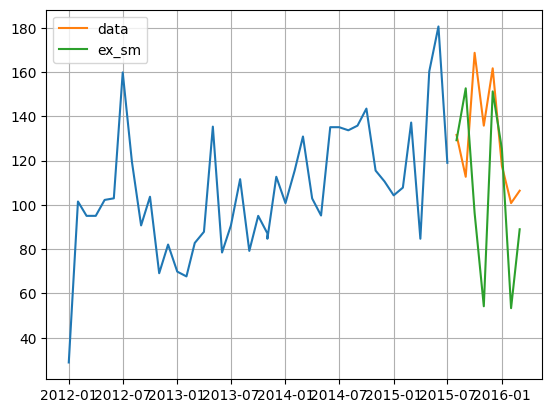

In [37]:
plt.plot(df_train.reset_index().date_month, df_train.sales)
plt.plot(df_test.reset_index().date_month, df_test.sales, label='data')



# plt.plot(test.date_month, np.exp(model_log.forecast(h))-1, label='log')

plt.plot(df_test.reset_index().date_month, y_pred_wn, label='ex_sm')
plt.legend()
plt.grid()

In [38]:
metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:

    # display(X)

    h = H
    n = len(X) - h

    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]

    # display(test)

    y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    # display((test[['const','month','year']]))

    
    # model = sm.OLS(y_train['sales'].values, train[['const','month','year']],fit_intercept=True).fit()
    # y_predict = model.predict(test[['const','month','year']])
    y_pred = np.array([0.5+np.random.rand(y_test.shape[0])])[0]*df_test['sales'].mean()


    df, mae, rmse = metrics(y_pred=y_pred, test_df=y_test)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


mae = 19.739389795681507, rmse = 22.598201584434435
mae = 30.559641503755888, rmse = 36.164239125917234
mae = 20.801447858683122, rmse = 25.6096592761365
mae = 20.56384896474717, rmse = 21.642019031093852
mae = 35.0124999469392, rmse = 35.91096150468397
mae = 50.52143301237049, rmse = 54.74381348710714


In [39]:
naive_metrics = metrics_df.set_index('idx').T
naive_metrics['n'] = len(X) - naive_metrics['h']
naive_metrics


idx,h,mae,rmse,n
4,4.0,19.739390,22.598202,48.0
8,8.0,30.559642,36.164239,44.0
12,12.0,20.801448,25.609659,40.0
16,16.0,20.563849,21.642019,36.0
20,20.0,35.012500,35.910962,32.0
24,24.0,50.521433,54.743813,28.0


<Axes: xlabel='n'>

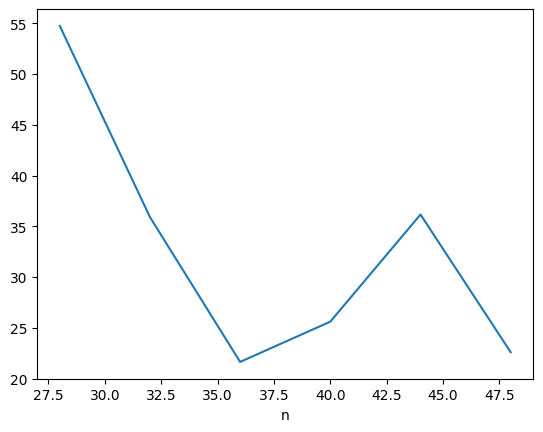

In [40]:
naive_metrics.set_index('n')['rmse'].plot()

# Linear Regression

In [38]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [39]:
tt_splt.sales

,id,date_month,sales
0,HOBBIES_1_016_CA_1_validation,2011-01-01,6.30
3,HOBBIES_1_016_CA_1_validation,2011-02-01,124.60
21,HOBBIES_1_016_CA_1_validation,2011-02-01,128.16
31,HOBBIES_1_016_CA_1_validation,2011-03-01,133.92
62,HOBBIES_1_016_CA_1_validation,2011-04-01,158.40
...,...,...,...
1767,HOBBIES_1_016_CA_1_validation,2015-12-01,161.70
1798,HOBBIES_1_016_CA_1_validation,2016-01-01,117.60
1829,HOBBIES_1_016_CA_1_validation,2016-02-01,100.80
1858,HOBBIES_1_016_CA_1_validation,2016-03-01,106.40


/tmp/ipykernel_2053/2914331047.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


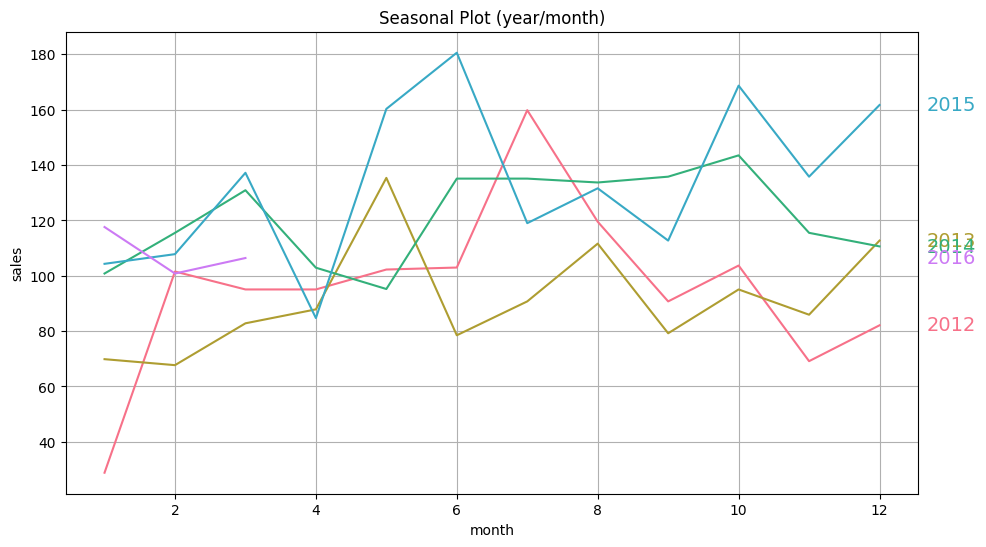

In [40]:

# # days within a year
# X["dayofyear"] = X.index.dayofyear

fig, ax0 = plt.subplots(1, 1, figsize=(11, 6))
seasonal_plot(X, y="sales", period="year", freq="month", ax=ax0)
# sns.lineplot(data=X, x="date_month", y="sales", hue='year', ax=ax0)

# seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);
plt.grid()

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

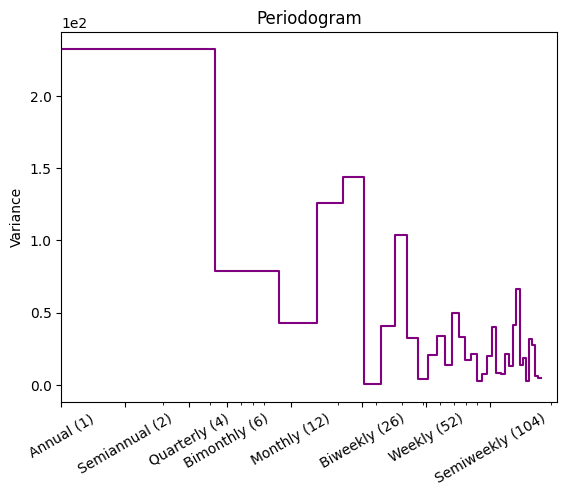

In [41]:
plot_periodogram(sales_val['sales'])

In [42]:
# X

## Linear Regression Model

In [43]:
model_lr = sm.OLS(df_train['sales'], df_train[['const','year','month']],fit_intercept=True).fit()

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)


In [44]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     7.527
Date:                Mon, 30 Sep 2024   Prob (F-statistic):            0.00164
Time:                        21:03:25   Log-Likelihood:                -202.21
No. Observations:                  44   AIC:                             410.4
Df Residuals:                      41   BIC:                             415.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.778e+04   7395.754     -3.757      0.001   -4.27e+04   -1.28e+04
year          13.8478      3.673      3.770      0.001       6.431      21.265
month          1.8252      1.114      1.639      0.109      -0.424       4.074
==============================================================================
Omnibus:                        2.962   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.015
Skew:                           0.498   Prob(JB):                        0.365
Kurtosis:                       3.324   Cond. No.                     3.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
y_pred_lr = model_lr.predict(df_test[['const','year','month']])

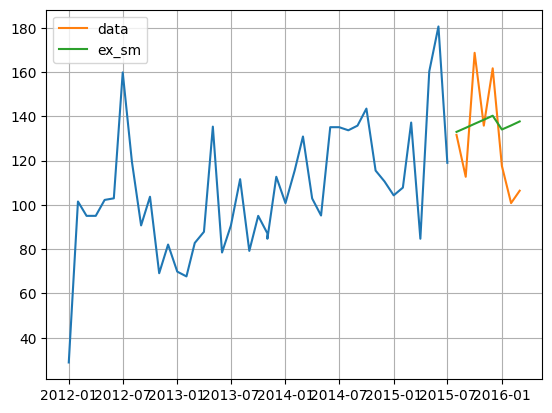

In [46]:
plt.plot(df_train.reset_index().date_month, df_train.sales)
plt.plot(df_test.reset_index().date_month, df_test.sales, label='data')


# plt.plot(test.date_month, np.exp(model_log.forecast(h))-1, label='log')

plt.plot(df_test.reset_index().date_month, y_pred_lr, label='ex_sm')
plt.legend()
plt.grid()


## Metrics Linear Regression

In [47]:
# df_train

In [48]:
metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:

    # display(X)

    h = H
    n = len(X) - h

    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]

    # display(test)

    y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    # display((test[['const','month','year']]))

    
    model = sm.OLS(y_train['sales'].values, train[['const','month','year']],fit_intercept=True).fit()
    y_predict = model.predict(test[['const','month','year']])

    df, mae, rmse = metrics(y_pred=y_predict, test_df=y_test)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


mae = 26.006961491803487, rmse = 27.114849921772983
mae = 14.552036685185527, rmse = 19.53246379146876
mae = 34.3, rmse = 38.22966767329973
mae = 14.442554532564827, rmse = 14.458002375417662
mae = 18.25449670385387, rmse = 21.146895466871705
mae = 17.656973135719998, rmse = 22.241443685502325


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_int

In [49]:
lr_metrics = metrics_df.set_index('idx').T
lr_metrics['n'] = len(X) - lr_metrics['h']
lr_metrics


idx,h,mae,rmse,n
4,4.0,26.006961,27.114850,48.0
8,8.0,14.552037,19.532464,44.0
12,12.0,34.300000,38.229668,40.0
16,16.0,14.442555,14.458002,36.0
20,20.0,18.254497,21.146895,32.0
24,24.0,17.656973,22.241444,28.0


<Axes: xlabel='n'>

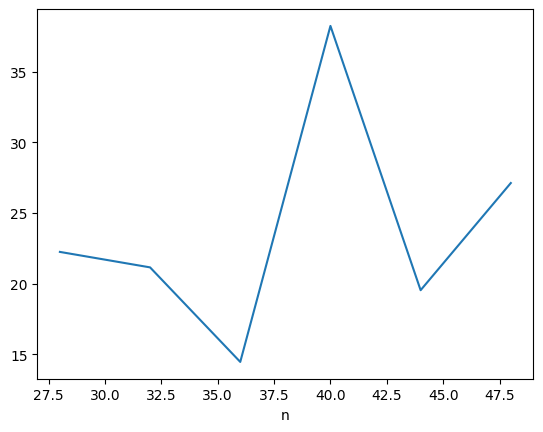

In [50]:
lr_metrics.set_index('n')['rmse'].plot()

## Linear Deterministic Process

In [51]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

df_train.index = pd.date_range(start=df_train.index[0], periods=len(df_train.index), freq="M")  # Adjust freq as needed

fourier = CalendarFourier(freq="M", order=12)  # annual seasonality ending in December

dp = DeterministicProcess(
    index=df_train.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X_dp = dp.in_sample()


/tmp/ipykernel_2053/642618489.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_train.index = pd.date_range(start=df_train.index[0], periods=len(df_train.index), freq="M")  # Adjust freq as needed
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [52]:
from sklearn.linear_model import LinearRegression


In [53]:
# X

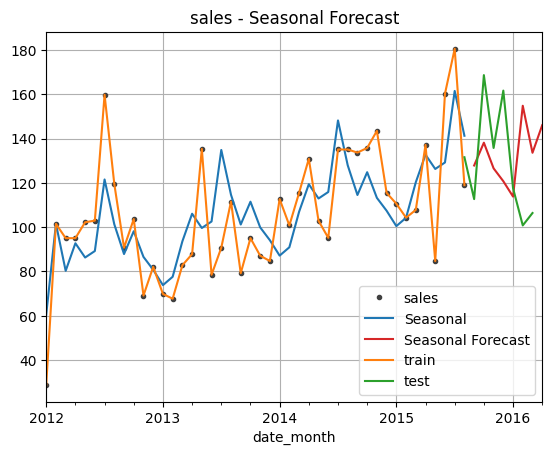

In [54]:
y = df_train['sales']

model_ldp = LinearRegression(fit_intercept=True)
_ = model_ldp.fit(X_dp, y)

y_pred = pd.Series(model_ldp.predict(X_dp), index=y.index)
X_fore = dp.out_of_sample(steps=8)
y_fore = pd.Series(model_ldp.predict(X_fore), index=X_fore.index)
y_pred_ldp = y_fore

ax = y.plot(color='0.25', style='.', title="sales - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
ax = df_train.sales.plot(label="train",ax=ax)
ax = df_test.sales.plot(label='test',ax=ax)
# plt.plot(test.reset_index().date_month, test.sales, label='data')

_ = ax.legend()
plt.grid()

## Metrics Linear Deterministic Process

In [55]:
# df_train

In [56]:
metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:
    # display(metrics_df)

    X.set_index('date_month').to_period('M')
    
    # display(X)

    h = H
    n = len(X) - h

    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]
    # display(test)

    train.index = pd.date_range(start=train.index[0], periods=len(train.index), freq="M")  # Adjust freq as needed

    fourier = CalendarFourier(freq="M", order=12)  # annual seasonality ending in December

    dp = DeterministicProcess(
        index=train.index,
        constant=True,               # dummy feature for bias (y-intercept)
        order=1,                     # trend (order 1 means linear)
        seasonal=True,               # weekly seasonality (indicators)
        additional_terms=[fourier],  # annual seasonality (fourier)
        drop=True,                   # drop terms to avoid collinearity
    )

    X_train = dp.in_sample()
    y_train = train['sales']


    # display(X)

    model = LinearRegression(fit_intercept=True)
    _ = model.fit(X_train, y_train)

    # display(model.score(X_train,y_train))

    y_pred = pd.Series(model.predict(X_train), index=y_train.index)

    y_test = test['sales']

    X_fore = dp.out_of_sample(steps=4)
    y_fore = pd.Series(model.predict(X_fore), index=y_test.index)

    
    # # display(y_test)
    # # display(y_fore)

    mae, rmse = mean_absolute_error(y_test,y_fore), root_mean_squared_error(y_test,y_fore)
    print("mae = {}, rmse = {}".format(mae, rmse))


    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


mae = 32.30798184357542, rmse = 35.42041597444581
mae = 22.76948717948717, rmse = 26.70398886991903
mae = 38.001666666666665, rmse = 39.598017718210244
mae = 12.370777777777754, rmse = 12.828631995041286
mae = 35.9156818181818, rmse = 38.166478344417314
mae = 11.665714285714277, rmse = 15.367665564358136


/tmp/ipykernel_2053/2244187258.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train.index = pd.date_range(start=train.index[0], periods=len(train.index), freq="M")  # Adjust freq as needed
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)
/tmp/ipykernel_2053/2244187258.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train.index = pd.date_range(start=train.index[0], periods=len(train.index), freq="M")  # Adjust freq as needed
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=f

In [57]:
ldp_metrics = metrics_df.set_index('idx').T
ldp_metrics['n'] = len(X) - ldp_metrics['h']
ldp_metrics


idx,h,mae,rmse,n
4,4.0,32.307982,35.420416,48.0
8,8.0,22.769487,26.703989,44.0
12,12.0,38.001667,39.598018,40.0
16,16.0,12.370778,12.828632,36.0
20,20.0,35.915682,38.166478,32.0
24,24.0,11.665714,15.367666,28.0


<Axes: xlabel='n'>

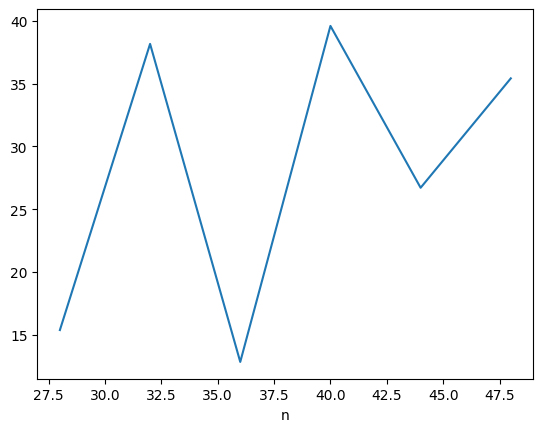

In [58]:
ldp_metrics.set_index('n')['rmse'].plot()

# Holt-Winters

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [60]:
y = X[['sales','date_month']].set_index('date_month').sort_index()

<Axes: xlabel='date_month'>

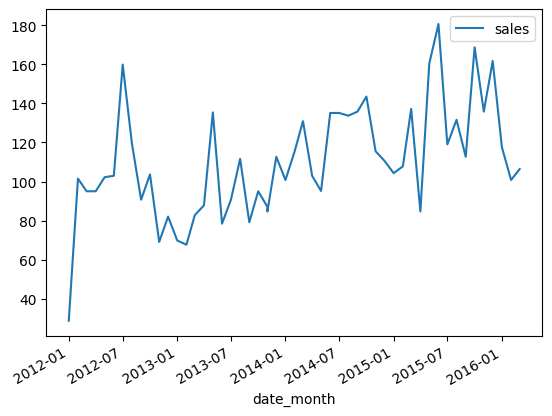

In [61]:
# y_i = 0 implies trend and seasonal not multiplicative
y.plot()


<Axes: xlabel='date_month'>

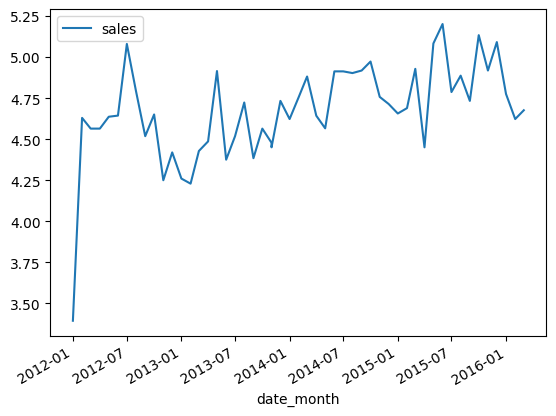

In [62]:
np.log1p(y).plot()

In [63]:
h = 8
n = len(X) - h
train_log = np.log1p(y)[:n].reset_index()
test_log = np.log1p(y)[n:].reset_index()


In [64]:

len(X), len(df_train), len(df_test), len(train_log), len(test_log)


(52, 44, 8, 44, 8)

In [65]:
train_log
test_log


,date_month,sales
0,2015-08-01,4.887337
1,2015-09-01,4.733563
2,2015-10-01,5.134032
3,2015-11-01,4.918520
4,2015-12-01,5.091908
5,2016-01-01,4.775756
6,2016-02-01,4.623010
7,2016-03-01,4.676560


In [66]:
model_log_hw = ExponentialSmoothing(endog=np.log1p(y), trend='add', damped_trend=True, seasonal='add', seasonal_periods=L).fit()
model_hw = ExponentialSmoothing(endog=y, trend='add', damped_trend=True, seasonal='mul', seasonal_periods=L).fit()


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
model_hw.summary()


Dep. Variable:,sales,No. Observations:,52
Model:,ExponentialSmoothing,SSE,23580.585
Optimized:,True,AIC,352.081
Trend:,Additive,BIC,385.252
Seasonal:,Multiplicative,AICC,375.831
Seasonal Periods:,12,Date:,"Mon, 30 Sep 2024"
Box-Cox:,False,Time:,21:03:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.5202e-07,alpha,True
smoothing_trend,6.4488e-15,beta,True


In [68]:
np.exp(model_log_hw.forecast(h))-1
model_hw.forecast(h)

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model with

52    132.113199
53    140.313541
54    178.836080
55    151.690180
56    138.458513
57    139.912303
58    150.917403
59    132.214210
dtype: float64

In [69]:
# df_train.reset_index().rename(name='date_month')
y_pred_hw = model_hw.forecast(h)
y_pred_hwl = np.exp(model_log_hw.forecast(h))-1

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model with

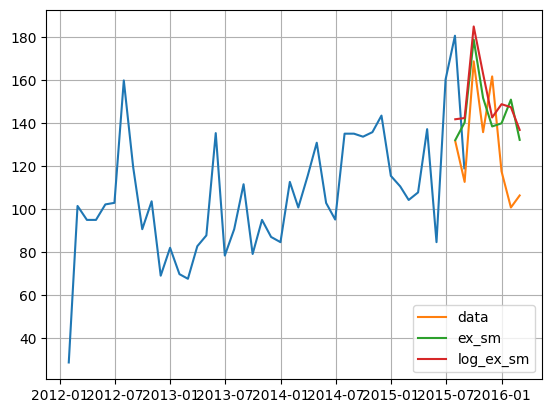

In [70]:
plt.plot(df_train.index, df_train.sales)
plt.plot(df_test.index, df_test.sales, label='data')

plt.plot(df_test.index, y_pred_hw, label='ex_sm')

plt.plot(df_test.index, y_pred_hwl, label='log_ex_sm')

plt.legend()
plt.grid()

## Metrics Holt Winters

In [71]:
N_init = 16
L = 12

metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:
    # display(metrics_df)
    h = H
    n = len(X) - h


    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]

    y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    model = ExponentialSmoothing(endog=y_train['sales'], trend='add', damped_trend=True, seasonal='mul', seasonal_periods=L).fit()
    # model_hw
    y_predict = model.forecast(4)

    # display(y_predict)
    # display(y_test)
    
    df, mae, rmse = metrics(y_pred=y_predict, test_df=y_test)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency informa

mae = 31.349132843914497, rmse = 36.694497656301145
mae = 24.70704331800212, rmse = 28.24156931825937
mae = 38.866554544360255, rmse = 41.96930438432825


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an 

mae = 15.304355349079067, rmse = 17.031122758835085
mae = 39.1562204484382, rmse = 41.31107490145273
mae = 20.318933194023018, rmse = 25.82521603801328


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [72]:
hw_metrics = metrics_df.set_index('idx').T
hw_metrics['n'] = len(X) - hw_metrics['h']
hw_metrics


idx,h,mae,rmse,n
4,4.0,31.349133,36.694498,48.0
8,8.0,24.707043,28.241569,44.0
12,12.0,38.866555,41.969304,40.0
16,16.0,15.304355,17.031123,36.0
20,20.0,39.156220,41.311075,32.0
24,24.0,20.318933,25.825216,28.0


<Axes: xlabel='n'>

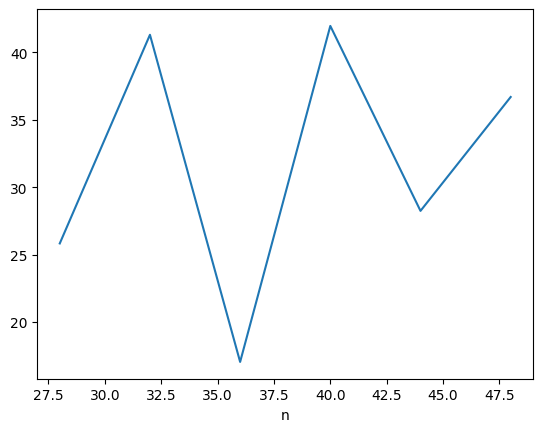

In [73]:
hw_metrics.set_index('n')['rmse'].plot()

## Metrics Holt Winters Log

In [74]:
N_init = 16
L = 12

metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:
    # display(metrics_df)
    h = H
    n = len(X) - h


    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]

    y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    model = ExponentialSmoothing(endog=np.log1p(y), trend='add', damped_trend=True, seasonal='add', seasonal_periods=L).fit()

    y_predict = model.forecast(4)

    # display(y_predict)
    # display(y_test)
    
    df, mae, rmse = metrics(y_pred=y_predict, test_df=y_test)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency informa

mae = 116.56215833570349, rmse = 119.00619810228433
mae = 132.13715833570348, rmse = 133.65136035511065


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an 

mae = 131.08715833570346, rmse = 136.21376128658113
mae = 109.91215833570348, rmse = 110.67864077061155
mae = 127.06215833570349, rmse = 127.47503467680524
mae = 112.01215833570349, rmse = 113.47013126704157


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
hwl_metrics = metrics_df.set_index('idx').T
hwl_metrics['n'] = len(X) - hwl_metrics['h']
hwl_metrics


idx,h,mae,rmse,n
4,4.0,116.562158,119.006198,48.0
8,8.0,132.137158,133.651360,44.0
12,12.0,131.087158,136.213761,40.0
16,16.0,109.912158,110.678641,36.0
20,20.0,127.062158,127.475035,32.0
24,24.0,112.012158,113.470131,28.0


<Axes: xlabel='n'>

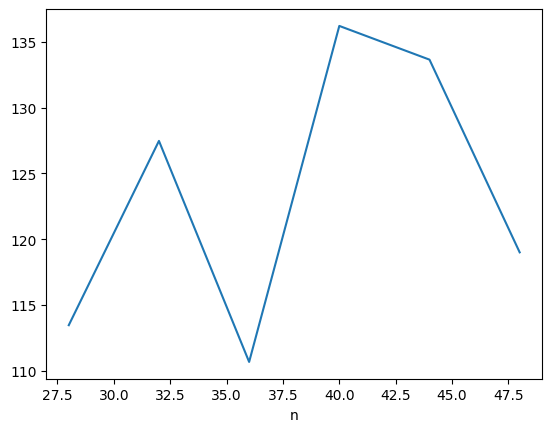

In [76]:
hwl_metrics.set_index('n')['rmse'].plot()

# SARIMA

In [77]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.seasonal import seasonal_decompose


<Figure size 640x480 with 0 Axes>

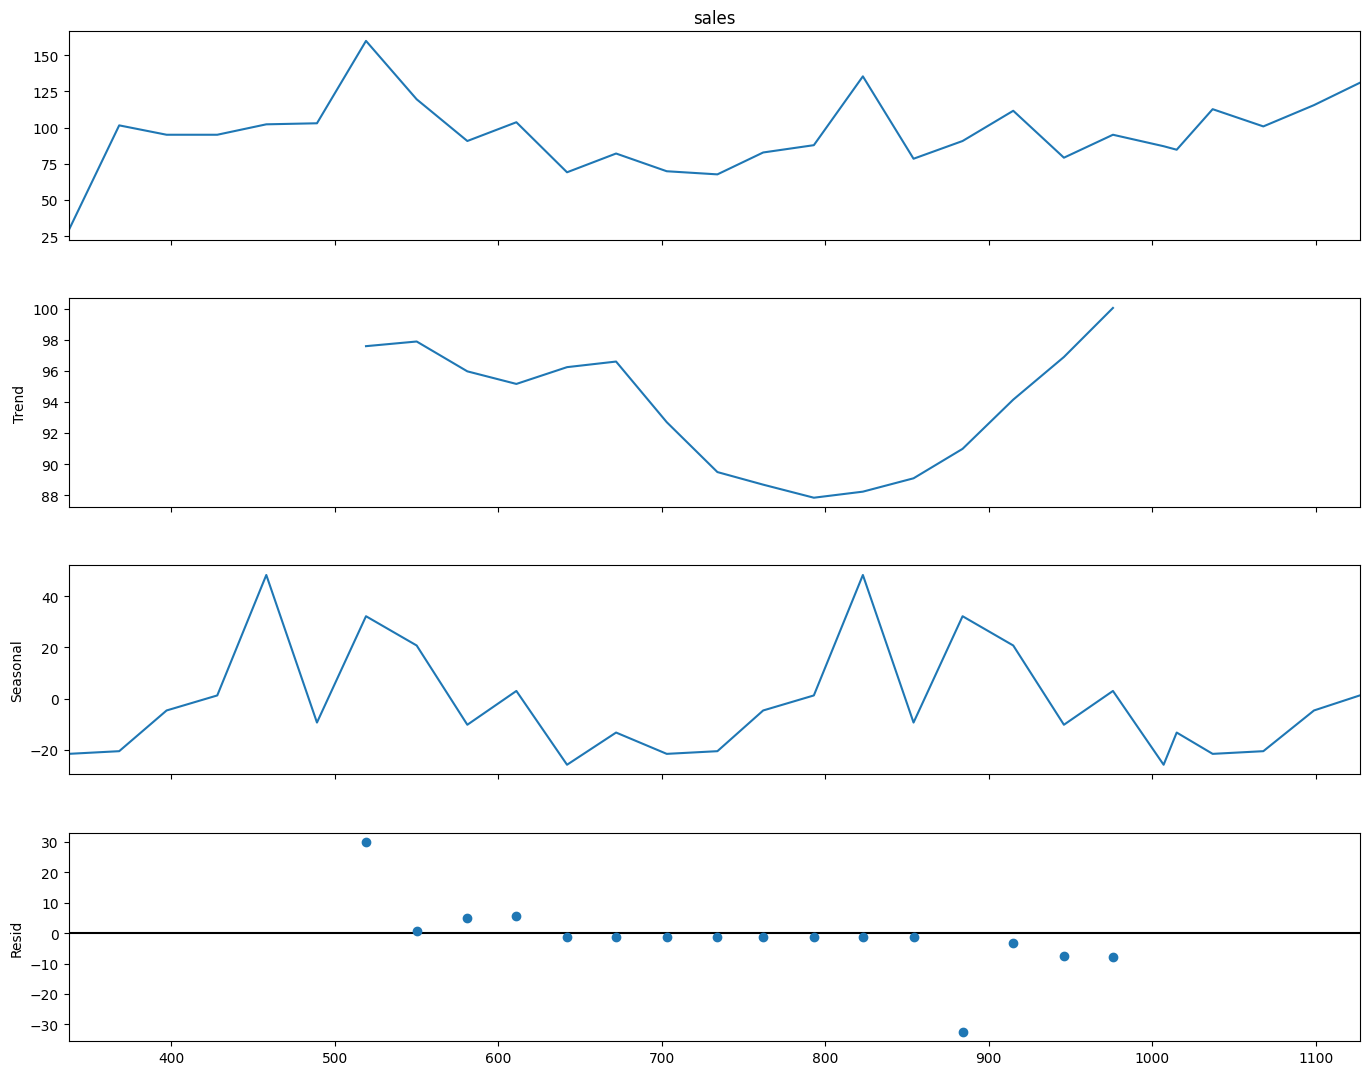

In [78]:
result = seasonal_decompose(train['sales'], model='additive', period=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [79]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = int(1*window) )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

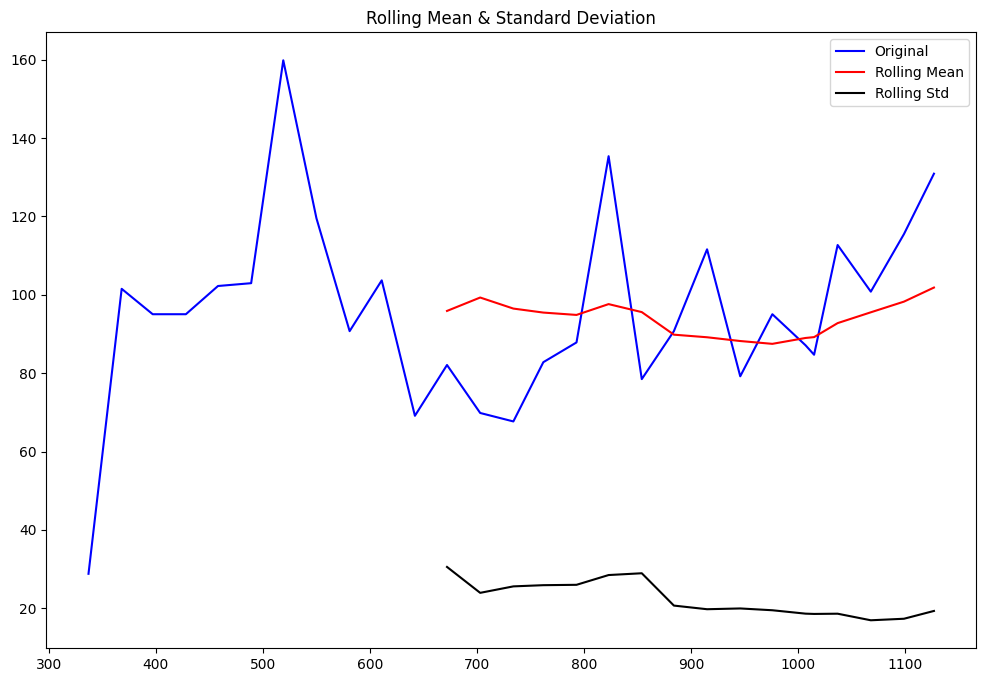

Results of Dickey-Fuller Test:
p-value = 0.3933. The series is likely non-stationary.
Test Statistic                 -1.774354
p-value                         0.393267
#Lags Used                     12.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [80]:
test_stationarity(train['sales'])

In [81]:
first_diff = train['sales'] - train['sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)
# test_stationarity(first_diff, window = L)

In [82]:
second_diff = first_diff - first_diff.shift(1)
second_diff = second_diff.dropna(inplace = False)
# test_stationarity(second_diff, window = L)

In [83]:
third_diff = second_diff - second_diff.shift(1)
third_diff = third_diff.dropna(inplace = False)
# test_stationarity(third_diff, window = L)

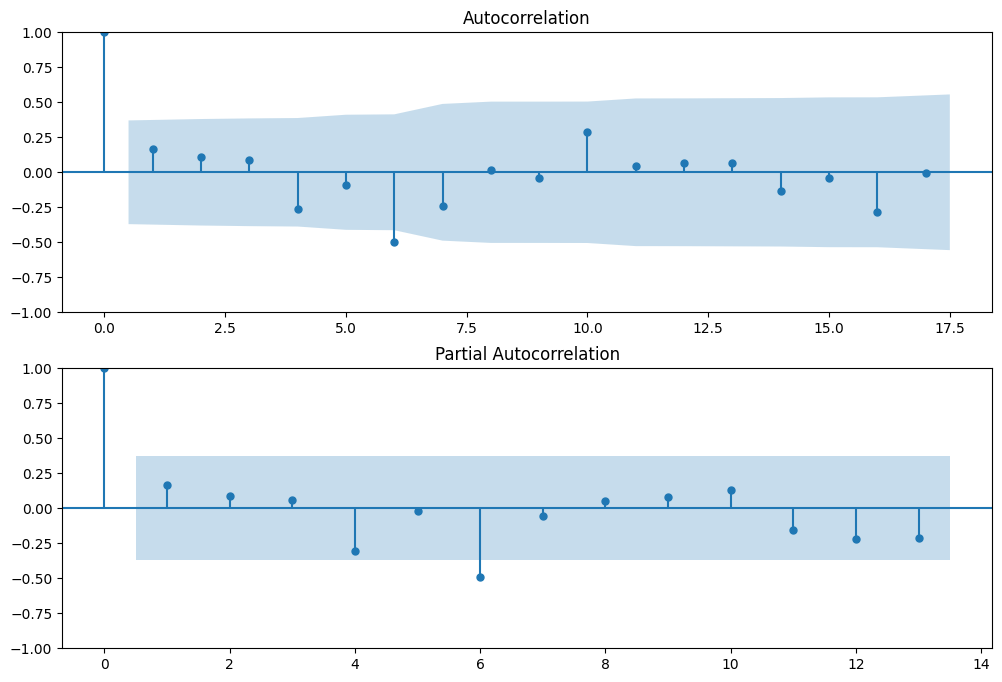

In [84]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['sales'], lags=17, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['sales'], lags=13, ax=ax2)# , lags=40

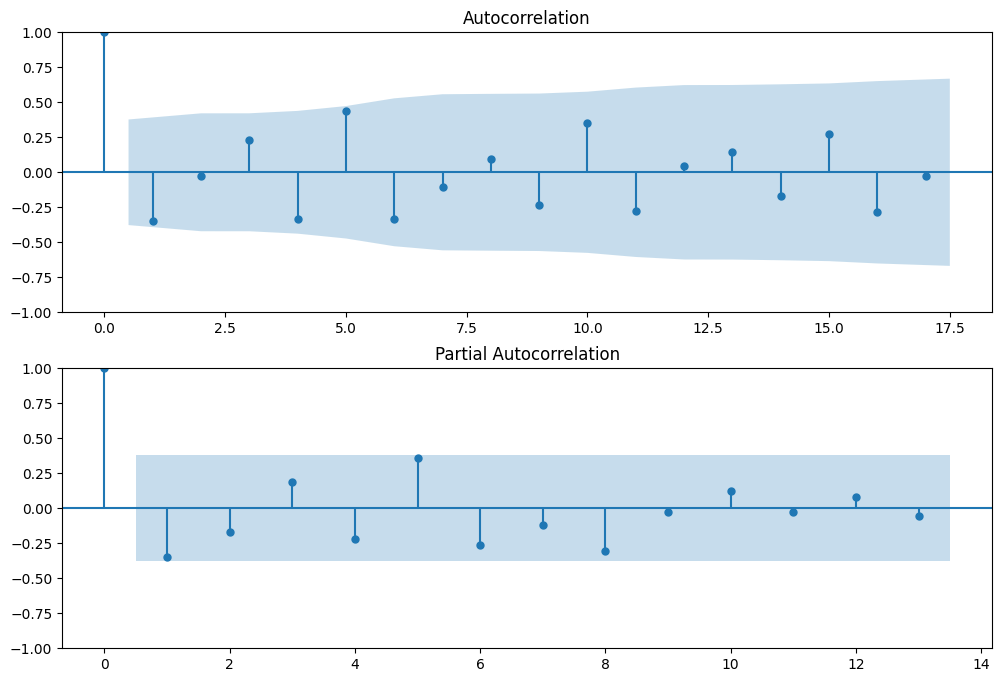

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=17, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=13, ax=ax2)# , lags=40

In [86]:
h = 8
n = len(X) - h

arima_mod = ARIMA(endog=df_train['sales'], order=(1,1,0)).fit() #(6,5,0), (1,1,0)
arima_mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   44
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -203.879
Date:                Mon, 30 Sep 2024   AIC                            411.759
Time:                        21:03:55   BIC                            415.281
Sample:                    01-31-2012   HQIC                           413.058
                         - 08-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4303      0.118     -3.638      0.000      -0.662      -0.198
sigma2       765.1392    169.139      4.524      0.000     433.634    1096.645
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.46   Prob(JB):                         0.70
Heteroskedasticity (H):               1.15   Skew:                             0.30
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2053/777315019.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipykernel_2053/777315019.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats


NormaltestResult(statistic=np.float64(0.9714500033277037), pvalue=np.float64(0.6152509770467663))


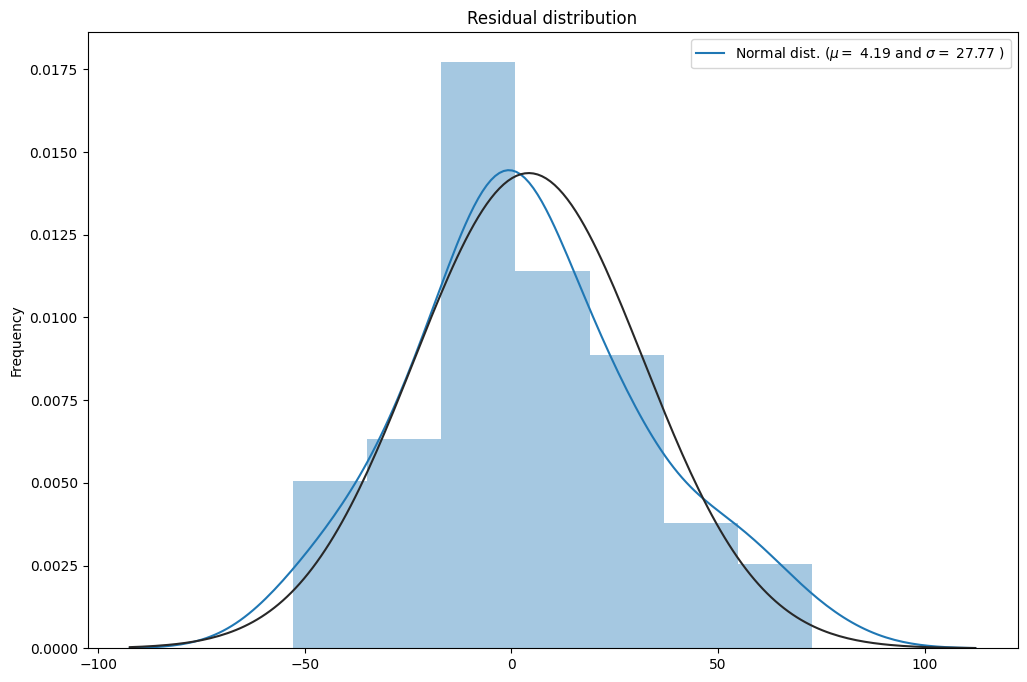

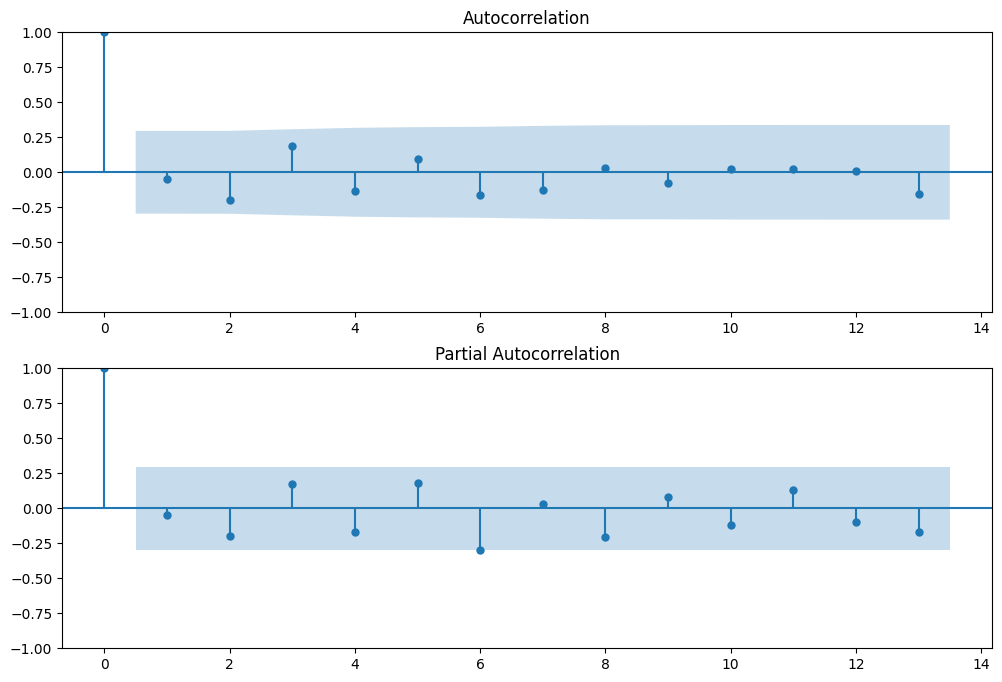

In [87]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod.resid, lags=13, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod.resid, lags=13, ax=ax2)

In [88]:
y_pred_arima = arima_mod.forecast(h)

In [89]:
df_train

,const,id,sales,month,count,year
2012-01-31,1.0,HOBBIES_1_016_CA_1_validation,28.80,1,1,2012
2012-02-29,1.0,HOBBIES_1_016_CA_1_validation,101.52,2,2,2012
2012-03-31,1.0,HOBBIES_1_016_CA_1_validation,95.04,3,3,2012
2012-04-30,1.0,HOBBIES_1_016_CA_1_validation,95.04,4,4,2012
2012-05-31,1.0,HOBBIES_1_016_CA_1_validation,102.24,5,5,2012
2012-06-30,1.0,HOBBIES_1_016_CA_1_validation,102.96,6,6,2012
2012-07-31,1.0,HOBBIES_1_016_CA_1_validation,159.84,7,7,2012
2012-08-31,1.0,HOBBIES_1_016_CA_1_validation,119.52,8,8,2012
2012-09-30,1.0,HOBBIES_1_016_CA_1_validation,90.72,9,9,2012
2012-10-31,1.0,HOBBIES_1_016_CA_1_validation,103.68,10,10,2012


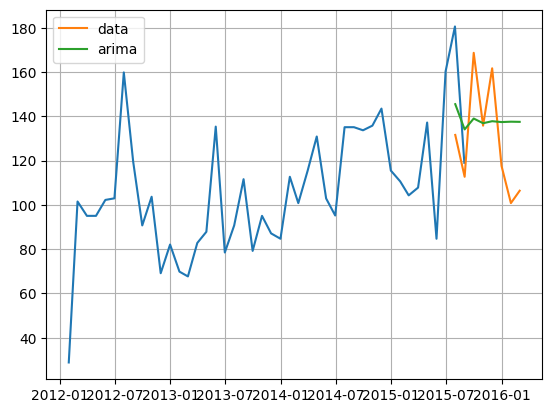

In [90]:
plt.plot(df_train.index, df_train.sales)
plt.plot(df_test.index, df_test.sales, label='data')


# plt.plot(df_test.index, np.exp(model_log_hw.forecast(h))-1, label='log')

plt.plot(df_test.index, y_pred_arima, label='arima')
plt.grid()
plt.legend()



## Metrics ARIMA

In [91]:
metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:
    # display(metrics_df)
    h = H
    n = len(X) - h


    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]

    y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    model = ARIMA(endog=y_train['sales'], order=(1,1,0)).fit()
    y_predict = model.forecast(4)

    df, mae, rmse = metrics(y_pred=y_predict, test_df=y_test)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an

mae = 30.691096438543838, rmse = 33.46317085369704
mae = 16.523578281012803, rmse = 19.58424555654981
mae = 33.37068848709896, rmse = 36.782164347116385
mae = 16.172452569831993, rmse = 16.24471232978702
mae = 7.525000000000002, rmse = 10.69076704451089
mae = 17.792455674844547, rmse = 20.20925346195148


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [92]:
arm_metrics = metrics_df.set_index('idx').T
arm_metrics['n'] = len(X) - arm_metrics['h']
arm_metrics


idx,h,mae,rmse,n
4,4.0,30.691096,33.463171,48.0
8,8.0,16.523578,19.584246,44.0
12,12.0,33.370688,36.782164,40.0
16,16.0,16.172453,16.244712,36.0
20,20.0,7.525000,10.690767,32.0
24,24.0,17.792456,20.209253,28.0


<Axes: xlabel='n'>

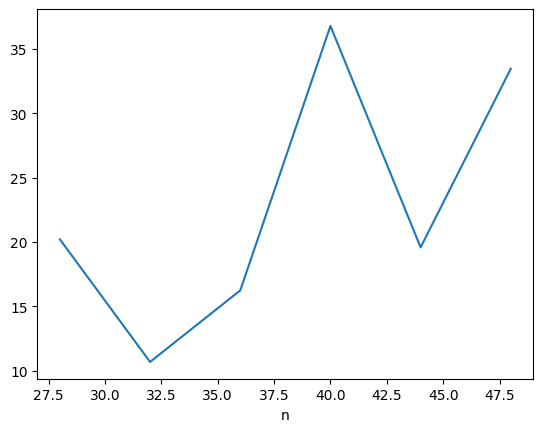

In [93]:
arm_metrics.set_index('n')['rmse'].plot()

In [94]:
sarima_mod = SARIMAX(endog=train['sales'], trend='n', order=(6,5,0), seasonal_order=(0,0,0,12)).fit() #(6,5,0), (1,1,0)
# sarima_mod = SARIMAX(train['sales'], trend='n', order=(6,1,0)).fit()
sarima_mod.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51600D+00    |proj g|=  3.99337D-01

At iterate    5    f=  4.46210D+00    |proj g|=  1.55614D-02

At iterate   10    f=  4.45970D+00    |proj g|=  5.61633D-03

At iterate   15    f=  4.45624D+00    |proj g|=  7.50933D-02

At iterate   20    f=  4.44517D+00    |proj g|=  2.18448D-03

At iterate   25    f=  4.44516D+00    |proj g|=  4.17391D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     28      1     0     0   

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   28
Model:               SARIMAX(6, 5, 0)   Log Likelihood                -124.465
Date:                Mon, 30 Sep 2024   AIC                            262.929
Time:                        21:04:06   BIC                            270.878
Sample:                             0   HQIC                           264.928
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3974      0.227    -10.575      0.000      -2.842      -1.953
ar.L2         -3.5780      0.641     -5.581      0.000      -4.835      -2.321
ar.L3         -3.5987      0.869     -4.142      0.000      -5.302      -1.896
ar.L4         -2.9031      0.817     -3.553      0.000      -4.505      -1.301
ar.L5         -1.5208      0.579     -2.625      0.009      -2.656      -0.385
ar.L6         -0.5089      0.291     -1.746      0.081      -1.080       0.062
sigma2      2150.6429   1303.385      1.650      0.099    -403.944    4705.230
===================================================================================
Ljung-Box (L1) (Q):                   2.08   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.15   Prob(JB):                         0.78
Heteroskedasticity (H):               0.54   Skew:                            -0.30
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
y_pred_sarima = sarima_mod.forecast(8)
y_pred_sarima


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


28    135.214327
29    145.096206
30    133.370547
31    126.512655
32     99.250738
33     51.619810
34    -15.647434
35   -118.903395
Name: predicted_mean, dtype: float64

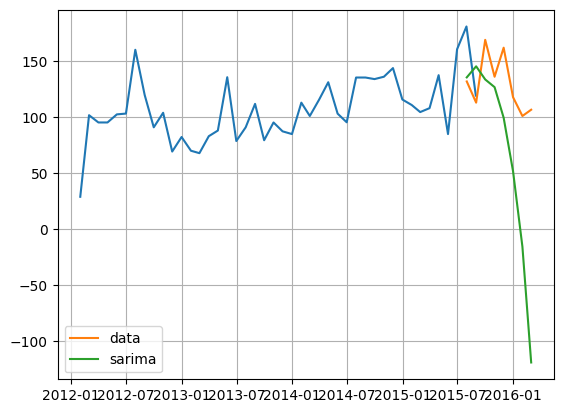

In [96]:
plt.plot(df_train.index, df_train.sales)
plt.plot(df_test.index, df_test.sales, label='data')


# plt.plot(test.date_month, np.exp(model_log.forecast(h))-1, label='log')

plt.plot(df_test.index, y_pred_sarima, label='sarima')
plt.legend()
plt.grid()


## Metrics SARIMA

In [97]:
metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:
    # display(metrics_df)
    h = H
    n = len(X) - h


    train = X[:n]
    if h == 4:
        test = X[n:]
    else:
        test = X[n:4-h]
 
    y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    model = SARIMAX(endog=y_train['sales'], order=(6,5,0), seasonal_order=(0,0,0,12)).fit()
    y_predict = model.forecast(4)

    df, mae, rmse = metrics(y_pred=y_predict, test_df=y_test)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, ca

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87252D+00    |proj g|=  1.49066D-01

At iterate    5    f=  4.86809D+00    |proj g|=  1.13230D-02

At iterate   10    f=  4.86608D+00    |proj g|=  1.32418D-02

At iterate   15    f=  4.86579D+00    |proj g|=  7.33975D-04

At iterate   20    f=  4.86578D+00    |proj g|=  7.26413D-04

At iterate   25    f=  4.86577D+00    |proj g|=  1.35102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency informa


At iterate    5    f=  4.62727D+00    |proj g|=  1.46722D-02

At iterate   10    f=  4.62587D+00    |proj g|=  3.11476D-03

At iterate   15    f=  4.62431D+00    |proj g|=  3.38707D-02

At iterate   20    f=  4.62123D+00    |proj g|=  1.18674D-03

At iterate   25    f=  4.62123D+00    |proj g|=  1.04150D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     27      1     0     0   1.042D-05   4.621D+00
  F =   4.6212280123921197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
mae = 372.72925909220436, rmse = 452.02849008561475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [98]:
sarm_metrics = metrics_df.set_index('idx').T
sarm_metrics['n'] = len(X) - sarm_metrics['h']
sarm_metrics


idx,h,mae,rmse,n
4,4.0,218.561236,266.438665,48.0
8,8.0,237.897056,312.787865,44.0
12,12.0,183.958429,223.896248,40.0
16,16.0,372.729259,452.028490,36.0
20,20.0,181.599149,224.913267,32.0
24,24.0,23.131833,30.044054,28.0


<Axes: xlabel='n'>

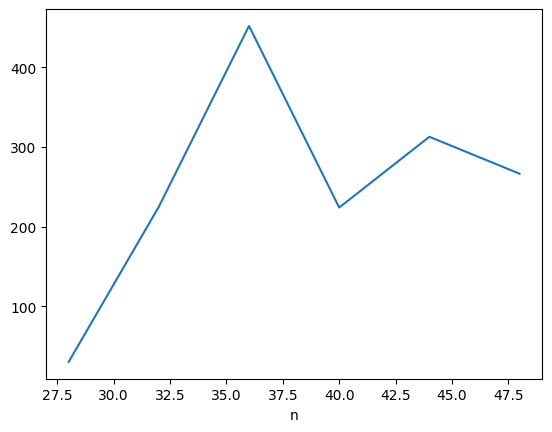

In [99]:
sarm_metrics.set_index('n')['rmse'].plot()

# Deep 

In [100]:
from neuralforecast import NeuralForecast
from neuralforecast.models import RNN
from neuralforecast.losses.pytorch import MQLoss

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-30 21:04:22,423	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-30 21:04:22,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [105]:
df_forecast_RNN = pd.DataFrame()
ic = 0.75
for epochs in [900,1100,1500,1700,2500]:
    data = X.copy()

    n = int(len(data)*0.8)
    train = data[:n].reset_index()
    test = data[n:].reset_index()

    # display(train)
    # display(test)
    
    levels_ic = [60,70,80,90,95]
    model_RNN = [RNN(input_size=len(train), h=len(test),
                loss=MQLoss(level=levels_ic), max_steps=epochs,
                batch_size=32,)]


    nf_RNN = NeuralForecast(models=model_RNN, freq='ME')
    # display(train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}))

    nf_RNN.fit(df=train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}), verbose=True)
    y_hat = nf_RNN.predict()
    y_hat = y_hat.reset_index()
    y_hat['ds'] = y_hat['ds'] + timedelta(days=1)

    y_hat.rename(columns={'unique_id':'id', 'ds':'date_month'}, inplace=True)    
    y_hat['date_month'] = y_hat['date_month'].dt.strftime("%Y-%m")#.set_index('date_month').sort_index()#
    y_hat['date_month'] = pd.to_datetime(y_hat['date_month'])

    data['date_month'] = data['date_month'].dt.strftime("%Y-%m")
    data['date_month'] = pd.to_datetime(data['date_month'])
    
    # display(y_hat)
    # display(sales.reset_index())


    y_final = pd.merge(data.reset_index(), y_hat.drop(columns='id'), on='date_month',  how='left')
    y_final['epochs'] = epochs

    df_forecast_RNN = pd.concat([df_forecast_RNN, y_final])

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 11     | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 22.1 K | train
5 | mlp_decoder     | MLP           | 4.4 K  | train
----------------------------------------------------------
147 K     Trainable params
11        Non-trainable params
147 K     Total params
0.590     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 37.29it/s, v_num=505, train_loss_step=0.0343, train_loss_epoch=0.0343]

`Trainer.fit` stopped: `max_steps=900` reached.


Epoch 899: 100%|██████████| 1/1 [00:00<00:00, 34.80it/s, v_num=505, train_loss_step=0.0343, train_loss_epoch=0.0343]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 229.65it/s]


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 11     | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 22.1 K | train
5 | mlp_decoder     | MLP           | 4.4 K  | train
----------------------------------------------------------
147 K     Trainable params
11        Non-trainable params
147 K     Total params
0.590

Epoch 1099: 100%|██████████| 1/1 [00:00<00:00, 34.71it/s, v_num=507, train_loss_step=0.0164, train_loss_epoch=0.0164]

`Trainer.fit` stopped: `max_steps=1100` reached.


Epoch 1099: 100%|██████████| 1/1 [00:00<00:00, 32.37it/s, v_num=507, train_loss_step=0.0164, train_loss_epoch=0.0164]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 176.87it/s]


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 11     | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 22.1 K | train
5 | mlp_decoder     | MLP           | 4.4 K  | train
----------------------------------------------------------
147 K     Trainable params
11        Non-trainable params
147 K     Total params
0.590

Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 32.75it/s, v_num=509, train_loss_step=0.00822, train_loss_epoch=0.00822]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 30.39it/s, v_num=509, train_loss_step=0.00822, train_loss_epoch=0.00822]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 207.77it/s]

/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 11     | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 22.1 K | train
5 | mlp_decoder     | MLP           | 4.4 K  | train
----------------------------------------------------------
147 K     Trainable params
11        Non-trainable params
147 K     Total params
0.590     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1699: 100%|██████████| 1/1 [00:00<00:00, 36.13it/s, v_num=511, train_loss_step=0.00911, train_loss_epoch=0.00911]

`Trainer.fit` stopped: `max_steps=1700` reached.


Epoch 1699: 100%|██████████| 1/1 [00:00<00:00, 33.19it/s, v_num=511, train_loss_step=0.00911, train_loss_epoch=0.00911]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 130.46it/s]


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 11     | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 22.1 K | train
5 | mlp_decoder     | MLP           | 4.4 K  | train
----------------------------------------------------------
147 K     Trainable params
11        Non-trainable params
147 K     Total params
0.590

Epoch 2499: 100%|██████████| 1/1 [00:00<00:00, 38.98it/s, v_num=513, train_loss_step=0.00479, train_loss_epoch=0.00479]

`Trainer.fit` stopped: `max_steps=2500` reached.


Epoch 2499: 100%|██████████| 1/1 [00:00<00:00, 35.93it/s, v_num=513, train_loss_step=0.00479, train_loss_epoch=0.00479]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 237.19it/s]


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [106]:
y_final

,index,const,id,date_month,sales,month,count,year,RNN-median,RNN-lo-95,RNN-lo-90,RNN-lo-80,RNN-lo-70,RNN-lo-60,RNN-hi-60,RNN-hi-70,RNN-hi-80,RNN-hi-90,RNN-hi-95,epochs
0,337,1.0,HOBBIES_1_016_CA_1_validation,2012-01-01,28.80,1,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
1,368,1.0,HOBBIES_1_016_CA_1_validation,2012-02-01,101.52,2,2,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
2,397,1.0,HOBBIES_1_016_CA_1_validation,2012-03-01,95.04,3,3,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
3,428,1.0,HOBBIES_1_016_CA_1_validation,2012-04-01,95.04,4,4,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
4,458,1.0,HOBBIES_1_016_CA_1_validation,2012-05-01,102.24,5,5,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
5,489,1.0,HOBBIES_1_016_CA_1_validation,2012-06-01,102.96,6,6,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
6,519,1.0,HOBBIES_1_016_CA_1_validation,2012-07-01,159.84,7,7,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
7,550,1.0,HOBBIES_1_016_CA_1_validation,2012-08-01,119.52,8,8,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
8,581,1.0,HOBBIES_1_016_CA_1_validation,2012-09-01,90.72,9,9,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500
9,611,1.0,HOBBIES_1_016_CA_1_validation,2012-10-01,103.68,10,10,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500


In [107]:

df_forecast_RNN

,index,const,id,date_month,sales,month,count,year,RNN-median,RNN-lo-95,RNN-lo-90,RNN-lo-80,RNN-lo-70,RNN-lo-60,RNN-hi-60,RNN-hi-70,RNN-hi-80,RNN-hi-90,RNN-hi-95,epochs
0,337,1.0,HOBBIES_1_016_CA_1_validation,2012-01-01,28.80,1,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
1,368,1.0,HOBBIES_1_016_CA_1_validation,2012-02-01,101.52,2,2,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
2,397,1.0,HOBBIES_1_016_CA_1_validation,2012-03-01,95.04,3,3,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
3,428,1.0,HOBBIES_1_016_CA_1_validation,2012-04-01,95.04,4,4,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
4,458,1.0,HOBBIES_1_016_CA_1_validation,2012-05-01,102.24,5,5,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1737,1.0,HOBBIES_1_016_CA_1_validation,2015-11-01,135.80,11,48,2015,141.967224,129.289215,128.103439,131.265427,129.813217,133.937225,155.061813,151.311127,145.354172,147.259506,149.124771,2500
48,1767,1.0,HOBBIES_1_016_CA_1_validation,2015-12-01,161.70,12,49,2015,99.817238,99.465034,99.927116,100.222603,99.290108,100.472321,104.618874,104.847733,103.698196,105.636627,104.518333,2500
49,1798,1.0,HOBBIES_1_016_CA_1_validation,2016-01-01,117.60,1,50,2016,133.991135,127.986313,126.611359,128.492371,127.355392,128.794067,136.088165,134.474075,132.083588,131.040756,133.736038,2500
50,1829,1.0,HOBBIES_1_016_CA_1_validation,2016-02-01,100.80,2,51,2016,131.805542,127.196983,127.298058,128.754257,126.434723,129.128510,137.853668,136.177338,133.370895,133.173462,134.076981,2500


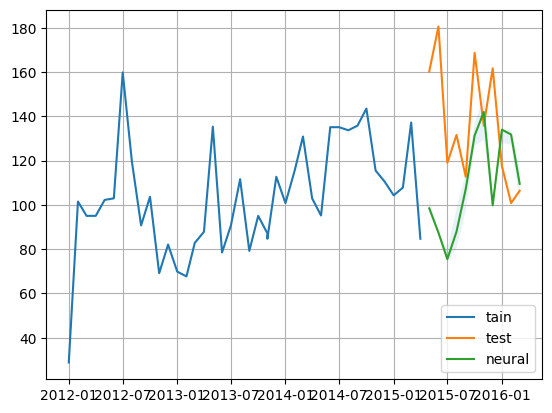

In [109]:
plt.plot(train.date_month, train.sales, label='tain')
plt.plot(test.date_month, test.sales, label='test')
plt.plot(y_hat.date_month, y_hat['RNN-median'], label='neural')
# plt.plot(y_final.date_month, y_final['sales'])

#plt.plot(y_hat.data, y_hat['RNN-lo-80.0'])
#plt.plot(y_hat.data, y_hat['RNN-hi-80.0'])

# plt.fill_between(y_hat.date_month, y_hat['RNN-lo-65'], y_hat['RNN-hi-65'], color='black', alpha=0.5)
# plt.fill_between(y_hat.date_month, y_hat['RNN-lo-70'], y_hat['RNN-hi-70'], color='black', alpha=0.4)
# plt.fill_between(y_hat.date_month, y_hat['RNN-lo-75'], y_hat['RNN-hi-75'], alpha=0.3)
# plt.fill_between(y_hat.date_month, y_hat['RNN-lo-80'], y_hat['RNN-hi-80'], color='red', alpha=0.25)
# plt.fill_between(y_hat.date_month, y_hat['RNN-lo-85'], y_hat['RNN-hi-85'], alpha=0.2)
# plt.fill_between(y_hat.date_month, y_hat['RNN-lo-90'], y_hat['RNN-hi-90'], alpha=0.15)
plt.fill_between(y_hat.date_month, y_hat['RNN-lo-95'], y_hat['RNN-hi-95'], alpha=0.1)
plt.grid()
plt.legend()

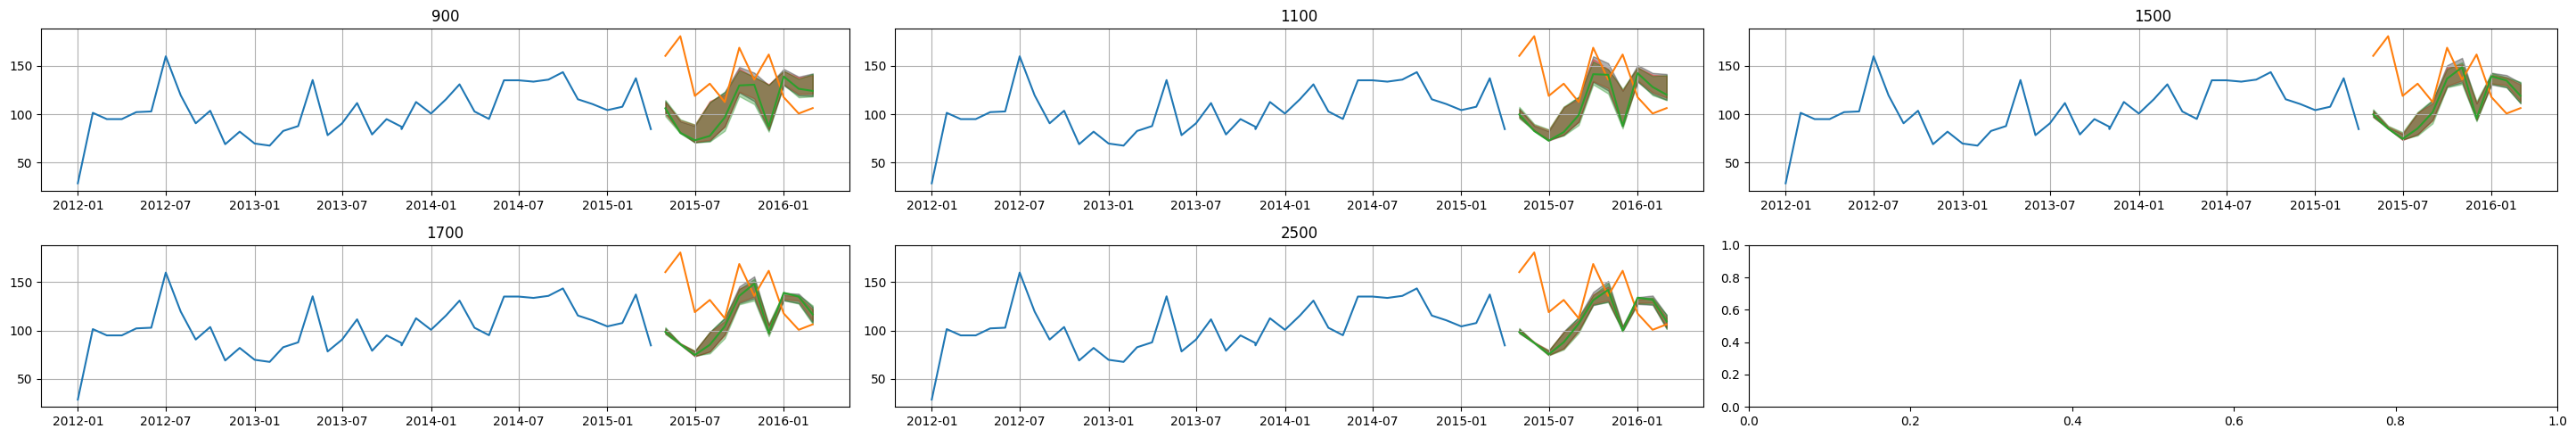

In [110]:
l2 = 5
l1 = 3//l2 + 1
# fig, ax = plt.subplots(l1, l2, figsize=(39,53))
fig, ax = plt.subplots(2, 3, figsize=(29,5))
for epochs in df_forecast_RNN.epochs.unique():
    
    # print(epochs)
    rota = df_forecast_RNN[df_forecast_RNN.epochs.eq(epochs)].sort_values(by='date_month')
    n = int(len(rota)*0.8)
    rota_train = rota[:n]
    rota_test = rota[n:]
    # display(rota_test)
    
    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].plot(rota_train.date_month, rota_train.sales)
    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].plot(rota_test.date_month, rota_test.sales)
    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].plot(rota_test.date_month, rota_test['RNN-median'])

    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].fill_between(rota_test.date_month, rota_test['RNN-lo-70'], rota_test['RNN-hi-70'], alpha=0.3, color='black')
    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].fill_between(rota_test.date_month, rota_test['RNN-lo-80'], rota_test['RNN-hi-80'], alpha=0.3, color='red')
    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].fill_between(rota_test.date_month, rota_test['RNN-lo-95'], rota_test['RNN-hi-95'], alpha=0.3, color='green')

    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].grid()
    ax.flatten()[df_forecast_RNN.epochs.unique().tolist().index(epochs)].set_title(epochs)

    
    #     #print(dict_names[int(rota.split('-')[0])]+'->'+dict_names[int(rota.split('-')[1])])
#     ax.flatten()[df_forecast_sts.rota_produto.unique().tolist().index(rota)].set_title(dict_names[int(rota.split('-')[0])]+'->'+dict_names[int(rota.split('-')[1])])
 
   #     #ax.flatten()[df_forecast.rota_produto.unique().tolist().index(rota)].set_xticklabels(ax.flatten()[df_forecast.rota_produto.unique().tolist().index(rota)].get_xticklabels(),rotation=15)
plt.tight_layout()

### RNN

In [101]:
epochs = 1500

H = 8
h = H
n = len(X) - h

train = X[:n].reset_index(drop=True)
# if h == 4:
#     test = X[n:].reset_index(drop=True)
# else:
#     test = X[n:4-h].reset_index(drop=True)
test = X[n:].reset_index(drop=True)


# display(train)
# display(test)

levels_ic = [70,90]
model_RNN = [RNN(input_size=len(train), h=len(test),
            loss=MQLoss(level=levels_ic), max_steps=epochs,
            batch_size=32,)]


nf_RNN = NeuralForecast(models=model_RNN, freq='M')
# # display(train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}))

nf_RNN.fit(df=train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}), verbose=True)
y_hat = nf_RNN.predict()
y_hat = y_hat.reset_index()
y_hat['ds'] = y_hat['ds'] + timedelta(days=1)

y_hat.rename(columns={'unique_id':'id', 'ds':'date_month'}, inplace=True)    
y_hat['date_month'] = y_hat['date_month'].dt.strftime("%Y-%m")#.set_index('date_month').sort_index()#
y_hat['date_month'] = pd.to_datetime(y_hat['date_month'])

X['date_month'] = X['date_month'].dt.strftime("%Y-%m")
X['date_month'] = pd.to_datetime(X['date_month'])

# display(y_hat)
# display(test)
# # # display(sales.reset_index())


y_final = pd.merge(X.reset_index(), y_hat.drop(columns='id'), on='date_month',  how='left')
y_final['epochs'] = epochs

# display(y_final[:4-h])

#y_final = y_final[:4-h -1].tail(4)
y_pred_neural = y_hat

# # y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
# # y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

# display(y_predict)
# df, mae, rmse = metrics(y_pred=y_predict['RNN-median'], test_df=test)
# print("mae = {}, rmse = {}".format(mae, rmse))
mae, rmse = mean_absolute_error(test['sales'].values,y_pred_neural['RNN-median'].values), root_mean_squared_error(test['sales'].values,y_pred_neural['RNN-median'].values)
print("mae = {}, rmse = {}".format(mae, rmse))

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 16.1 K | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
140 K     Trainable params
5         Non-trainable params
140 K     Total params
0.561     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 40.40it/s, v_num=561, train_loss_step=0.00387, train_loss_epoch=0.00387]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 36.12it/s, v_num=561, train_loss_step=0.00387, train_loss_epoch=0.00387]


/home/codespace/.python/current/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/codespace/.python/current/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 233.26it/s]
mae = 31.828476524353025, rmse = 40.11149403504894


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


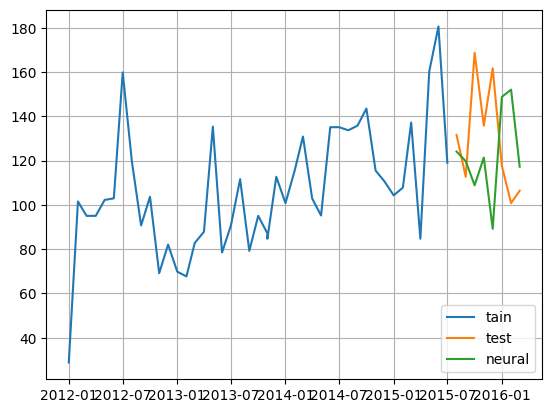

In [105]:
plt.plot(train.date_month, train.sales, label='tain')
plt.plot(test.date_month, test.sales, label='test')
plt.plot(y_pred_neural.date_month, y_pred_neural['RNN-median'], label='neural')

# plt.fill_between(y_hat.date_month, y_pred_neural['RNN-lo-95'], y_pred_neural['RNN-hi-95'], alpha=0.1)
plt.grid()
plt.legend()

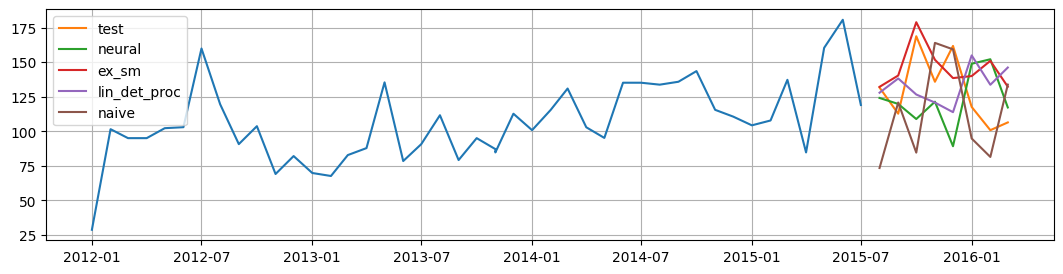

In [106]:

plt.figure(figsize=(13,3))
plt.plot(train.date_month, train.sales)#, label='tain')
plt.plot(test.date_month, test.sales, label='test')
plt.plot(test.date_month, y_pred_neural['RNN-median'], label='neural')
# # plt.plot(test.date_month, y_pred_arima, label='arima')
plt.plot(test.date_month, y_pred_hw, label='ex_sm')
# # plt.plot(test.date_month, y_pred_hwl, label='log_ex_sm')
plt.plot(test.date_month, y_pred_ldp, label='lin_det_proc')
# # plt.plot(test.date_month, y_pred_lr, label='lin_reg')
plt.plot(test.date_month, y_pred_wn, label='naive')

# plt.fill_between(test.date_month, y_pred_neural['RNN-lo-90'], y_pred_neural['RNN-hi-90'], alpha=0.1)
plt.grid()
plt.legend()

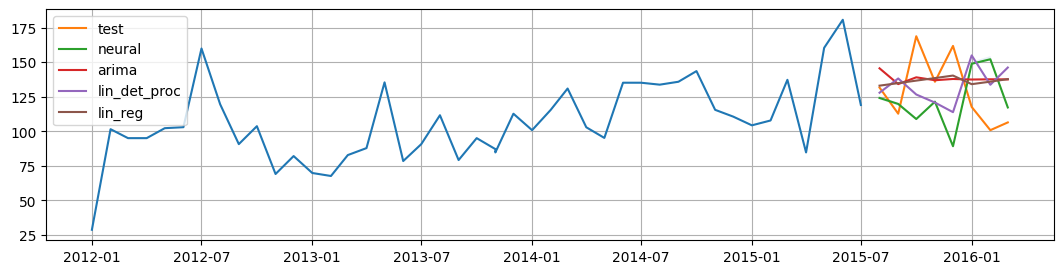

In [107]:
plt.figure(figsize=(13,3))
plt.plot(train.date_month, train.sales)#, label='tain')
plt.plot(test.date_month, df_test.sales, label='test')
plt.plot(test.date_month, y_pred_neural['RNN-median'], label='neural')
plt.plot(test.date_month, y_pred_arima, label='arima')
# plt.plot(test.date_month, y_pred_hw, label='ex_sm')
# plt.plot(test.date_month, y_pred_hwl, label='log_ex_sm')
plt.plot(test.date_month, y_pred_ldp, label='lin_det_proc')
plt.plot(test.date_month, y_pred_lr, label='lin_reg')
# plt.plot(test.date_month, y_pred_wn, label='naive')

plt.fill_between(test.date_month, y_pred_neural['RNN-lo-90'], y_pred_neural['RNN-hi-90'], alpha=0.1)
plt.grid()
plt.legend()


## Metrics Neural

In [108]:
epochs = 1500
metrics_df = pd.DataFrame({'idx':['h','mae','rmse']})

for H in [4,8,12,16,20,24]:
    # display(metrics_df)
    h = H
    n = len(X) - h

    train = X[:n].reset_index(drop=True)
    if h == 4:
        test = X[n:].reset_index(drop=True)
    else:
        test = X[n:4-h].reset_index(drop=True)

    # display(train)
    # display(test)
    
    levels_ic = [70,90]
    model_RNN = [RNN(input_size=len(train), h=len(test),
                loss=MQLoss(level=levels_ic), max_steps=epochs,
                batch_size=32,)]


    nf_RNN = NeuralForecast(models=model_RNN, freq='ME')
    # # display(train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}))

    nf_RNN.fit(df=train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}), verbose=True)
    y_hat = nf_RNN.predict()
    y_hat = y_hat.reset_index()
    y_hat['ds'] = y_hat['ds'] + timedelta(days=1)
    
    y_hat.rename(columns={'unique_id':'id', 'ds':'date_month'}, inplace=True)    
    y_hat['date_month'] = y_hat['date_month'].dt.strftime("%Y-%m")#.set_index('date_month').sort_index()#
    y_hat['date_month'] = pd.to_datetime(y_hat['date_month'])

    # data['date_month'] = X['date_month'].dt.strftime("%Y-%m")
    # data['date_month'] = pd.to_datetime(X['date_month'])
    
    # display(y_hat)
    # display(test)
    # # # display(sales.reset_index())


    y_final = pd.merge(X.reset_index(), y_hat.drop(columns='id'), on='date_month',  how='left')
    y_final['epochs'] = epochs

    # display(y_final[:4-h -1])

    y_final = y_final[:4-h].tail(4)
    y_predict = y_hat


    # # y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
    # # y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

    # display(y_predict)
    # df, mae, rmse = metrics(y_pred=y_predict['RNN-median'], test_df=test)
    # print("mae = {}, rmse = {}".format(mae, rmse))
    mae, rmse = mean_absolute_error(test['sales'].values,y_predict['RNN-median'].values), root_mean_squared_error(test['sales'].values,y_predict['RNN-median'].values)
    print("mae = {}, rmse = {}".format(mae, rmse))

    aux_df = pd.DataFrame({f'{h}':[h,mae,rmse]}, index=metrics_df.index)
    metrics_df = pd.concat([metrics_df, aux_df], axis=1)


Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 8.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
132 K     Trainable params
5         Non-trainable params
132 K     Total params
0.529     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 36.93it/s, v_num=563, train_loss_step=0.00616, train_loss_epoch=0.00616]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 34.26it/s, v_num=563, train_loss_step=0.00616, train_loss_epoch=0.00616]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 209.60it/s]

/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1



mae = 30.664674758911133, rmse = 37.6420314644975


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 8.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
132 K     Trainable params
5         Non-trainable params
132 K     Total params
0.529     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 36.77it/s, v_num=565, train_loss_step=0.00419, train_loss_epoch=0.00419]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 34.36it/s, v_num=565, train_loss_step=0.00419, train_loss_epoch=0.00419]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 156.71it/s]
mae = 30.692005920410153, rmse = 37.89265424204641


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 8.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
132 K     Trainable params
5         Non-trainable params
132 K     Total params
0.529

Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 37.33it/s, v_num=567, train_loss_step=0.00454, train_loss_epoch=0.00454]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 33.89it/s, v_num=567, train_loss_step=0.00454, train_loss_epoch=0.00454]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 243.61it/s]
mae = 34.14345245361328, rmse = 41.783876916822415


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 8.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
132 K     Trainable params
5         Non-trainable params
132 K     Total params
0.529

Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 37.94it/s, v_num=569, train_loss_step=0.00334, train_loss_epoch=0.00334]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 34.86it/s, v_num=569, train_loss_step=0.00334, train_loss_epoch=0.00334]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 185.77it/s]


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1


mae = 24.64949264526367, rmse = 32.79997883391917


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 8.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
132 K     Trainable params
5         Non-trainable params
132 K     Total params
0.529     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 38.51it/s, v_num=571, train_loss_step=0.00444, train_loss_epoch=0.00444] 

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 35.15it/s, v_num=571, train_loss_step=0.00444, train_loss_epoch=0.00444]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 113.51it/s]


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
Seed set to 1


mae = 23.70034027099609, rmse = 27.13255847342622


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 8.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
132 K     Trainable params
5         Non-trainable params
132 K     Total params
0.529     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 39.36it/s, v_num=573, train_loss_step=0.00332, train_loss_epoch=0.00332] 

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 36.19it/s, v_num=573, train_loss_step=0.00332, train_loss_epoch=0.00332]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 212.93it/s]
mae = 26.554214096069334, rmse = 32.03957570863541


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [109]:
y_final[:-1].tail(h)['sales']
# y_final.set_index('date_month')['sales']
test['sales']

0    102.9
1     95.2
2    135.1
3    135.1
Name: sales, dtype: float64

In [110]:

y_final

,index,const,id,date_month,sales,month,count,year,RNN-median,RNN-lo-90,RNN-lo-70,RNN-hi-70,RNN-hi-90,epochs
28,1158,1.0,HOBBIES_1_016_CA_1_validation,2014-04-01,102.9,4,29,2014,80.891129,80.547775,80.946281,80.908340,81.221565,1500
29,1188,1.0,HOBBIES_1_016_CA_1_validation,2014-05-01,95.2,5,30,2014,96.865997,96.589569,96.852165,97.046509,97.101112,1500
30,1219,1.0,HOBBIES_1_016_CA_1_validation,2014-06-01,135.1,6,31,2014,104.133904,103.451965,103.661247,104.742958,104.361458,1500
31,1249,1.0,HOBBIES_1_016_CA_1_validation,2014-07-01,135.1,7,32,2014,83.524109,83.180756,83.348862,83.765327,83.807129,1500


In [111]:
metrics_df

,idx,4,8,12,16,20,24
0,h,4.000000,8.000000,12.000000,16.000000,20.000000,24.000000
1,mae,30.664675,30.692006,34.143452,24.649493,23.700340,26.554214
2,rmse,37.642031,37.892654,41.783877,32.799979,27.132558,32.039576


In [112]:
neural_metrics = metrics_df.set_index('idx').T
neural_metrics['n'] = len(X) - neural_metrics['h']
neural_metrics


idx,h,mae,rmse,n
4,4.0,30.664675,37.642031,48.0
8,8.0,30.692006,37.892654,44.0
12,12.0,34.143452,41.783877,40.0
16,16.0,24.649493,32.799979,36.0
20,20.0,23.700340,27.132558,32.0
24,24.0,26.554214,32.039576,28.0


<Axes: xlabel='n'>

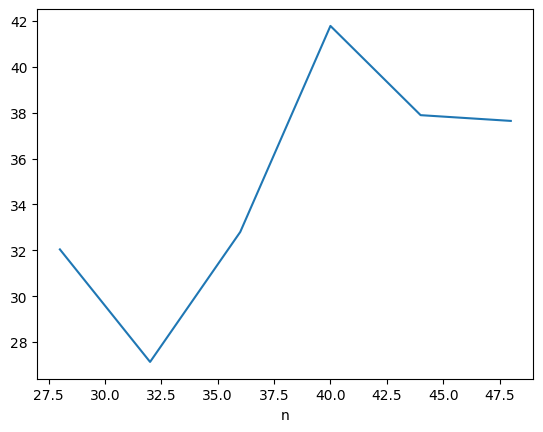

In [113]:
neural_metrics.set_index('n')['rmse'].plot()

# Comparation

## Metrics

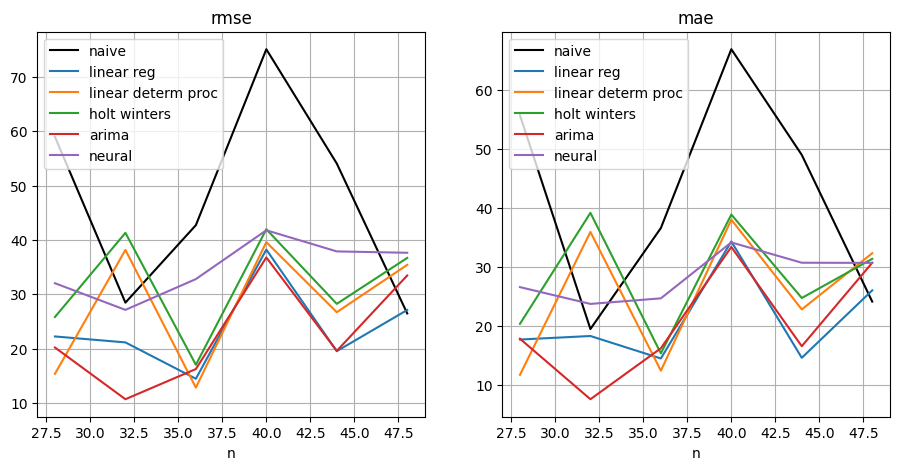

In [129]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,5))
naive_metrics.set_index('n')['rmse'].plot(label='naive', ax=ax1, color='black')

lr_metrics.set_index('n')['rmse'].plot(label='linear reg', ax=ax1)
ldp_metrics.set_index('n')['rmse'].plot(label='linear determ proc', ax=ax1)
hw_metrics.set_index('n')['rmse'].plot(label='holt winters', ax=ax1)
arm_metrics.set_index('n')['rmse'].plot(label='arima', ax=ax1)
# sarm_metrics.set_index('n')['rmse'].plot(label='sarima', ax=ax1)
neural_metrics.set_index('n')['rmse'].plot(label='neural', ax=ax1)
ax1.legend()
ax1.set_title('rmse')
ax1.grid()

naive_metrics.set_index('n')['mae'].plot(label='naive', ax=ax2, color='black')
lr_metrics.set_index('n')['mae'].plot(label='linear reg', ax=ax2)
ldp_metrics.set_index('n')['mae'].plot(label='linear determ proc', ax=ax2)
hw_metrics.set_index('n')['mae'].plot(label='holt winters', ax=ax2)
arm_metrics.set_index('n')['mae'].plot(label='arima', ax=ax2)
# sarm_metrics.set_index('n')['mae'].plot(label='sarima', ax=ax2)
neural_metrics.set_index('n')['mae'].plot(label='neural', ax=ax2)
ax2.legend()
ax2.set_title('mae')
ax2.grid()


In [130]:
test
y_pred_neural

,id,date_month,RNN-median,RNN-lo-90,RNN-lo-70,RNN-hi-70,RNN-hi-90
0,HOBBIES_1_016_CA_1_validation,2015-08-01,124.086563,122.988731,123.432205,124.257927,125.133476
1,HOBBIES_1_016_CA_1_validation,2015-09-01,119.759903,118.549545,119.457146,120.638023,120.753761
2,HOBBIES_1_016_CA_1_validation,2015-10-01,108.853470,108.109879,108.284149,109.407890,109.612701
3,HOBBIES_1_016_CA_1_validation,2015-11-01,121.385887,121.099457,121.628204,122.375404,122.710808
4,HOBBIES_1_016_CA_1_validation,2015-12-01,89.192825,88.686058,88.517418,89.537300,89.675629
5,HOBBIES_1_016_CA_1_validation,2016-01-01,148.805435,147.891235,148.548767,149.145599,150.335968
6,HOBBIES_1_016_CA_1_validation,2016-02-01,152.060394,151.469238,152.255127,153.276276,154.313110
7,HOBBIES_1_016_CA_1_validation,2016-03-01,117.220825,117.079208,117.181717,117.900597,118.184982


## Training

### Split

In [131]:
L = 12


H = 8
train = X = tt_splt.procs_X().copy()

N_init = 16
N_end = 0
tt_splt_eval = tt_split(sales_eval, N_init, N_end, L, H)

In [132]:
train

,const,id,date_month,sales,month,count,year
337,1.0,HOBBIES_1_016_CA_1_validation,2012-01-01,28.80,1,1,2012
368,1.0,HOBBIES_1_016_CA_1_validation,2012-02-01,101.52,2,2,2012
397,1.0,HOBBIES_1_016_CA_1_validation,2012-03-01,95.04,3,3,2012
428,1.0,HOBBIES_1_016_CA_1_validation,2012-04-01,95.04,4,4,2012
458,1.0,HOBBIES_1_016_CA_1_validation,2012-05-01,102.24,5,5,2012
489,1.0,HOBBIES_1_016_CA_1_validation,2012-06-01,102.96,6,6,2012
519,1.0,HOBBIES_1_016_CA_1_validation,2012-07-01,159.84,7,7,2012
550,1.0,HOBBIES_1_016_CA_1_validation,2012-08-01,119.52,8,8,2012
581,1.0,HOBBIES_1_016_CA_1_validation,2012-09-01,90.72,9,9,2012
611,1.0,HOBBIES_1_016_CA_1_validation,2012-10-01,103.68,10,10,2012


In [133]:
test = tt_splt_eval.procs_X().copy().tail(2)


In [134]:
test

,const,id,date_month,sales,month,count,year
1889,1.0,HOBBIES_1_016_CA_1_evaluation,2016-04-01,140.7,4,53,2016
1919,1.0,HOBBIES_1_016_CA_1_evaluation,2016-05-01,70.7,5,54,2016


In [135]:
train = train.set_index('date_month')

### Naive

In [136]:
y_pred_naive = np.array([0.5+np.random.rand(test.shape[0])])[0]*train['sales'].mean()

### Linear Regression

In [137]:
model_lr = sm.OLS(train['sales'].values, train[['const','month','year']],fit_intercept=True).fit()
y_pred_lr = model_lr.predict(test[['const','month','year']])

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['fit_intercept']
  warnings.warn(msg, ValueWarning)


### Linear Deterministic Process

In [138]:
train.index = pd.date_range(start=train.index[0], periods=len(train.index), freq="M")  # Adjust freq as needed

fourier = CalendarFourier(freq="M", order=12)  # annual seasonality ending in December

dp = DeterministicProcess(
    index=train.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X_dp = dp.in_sample()


y = train['sales']
X_dp = dp.in_sample()

len(y), len(X_dp)
model_ldp = LinearRegression(fit_intercept=True)
_ = model_ldp.fit(X_dp, y)

y_pred = pd.Series(model_ldp.predict(X_dp), index=y.index)
X_fore = dp.out_of_sample(steps=len(test))
y_pred_ldp = pd.Series(model_ldp.predict(X_fore), index=X_fore.index)
 

/tmp/ipykernel_2053/950090461.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train.index = pd.date_range(start=train.index[0], periods=len(train.index), freq="M")  # Adjust freq as needed
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


### Exponentia Smoothing

In [139]:
model_hw = ExponentialSmoothing(endog=train['sales'], trend='add', damped_trend=True, seasonal='mul', seasonal_periods=L).fit()
# model_hw.summary()
y_pred_hw = model_hw.forecast(2)


### ARIMA

In [140]:
arima_mod = ARIMA(endog=train['sales'], order=(1,1,0)).fit() #(6,5,0), (1,1,0)
arima_mod.summary()
y_pred_arima = arima_mod.forecast(2)


### RNN

In [143]:
epochs = 1500
X = tt_splt.procs_X()
H = 1
h = H
n = len(X) - h

# train = X[:n].reset_index(drop=True)
# # if h == 4:
# #     test = X[n:].reset_index(drop=True)
# # else:
# #     test = X[n:4-h].reset_index(drop=True)
# test = X[n:].reset_index(drop=True)
df_train = train.reset_index().rename(columns={'index':'date_month'})
df_test = test.reset_index().rename(columns={'index':'date_month'})


# display(df_train)
# display(df_test)

levels_ic = [70,90]
model_RNN = [RNN(input_size=len(df_train), h=len(df_test),
            loss=MQLoss(level=levels_ic), max_steps=epochs,
            batch_size=32,)]


nf_RNN = NeuralForecast(models=model_RNN, freq='M')
# # display(train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}))

nf_RNN.fit(df=df_train.rename(columns={'date_month':'ds','sales':'y','id':'unique_id'}), verbose=True)
y_hat = nf_RNN.predict()
y_hat = y_hat.reset_index()
y_hat['ds'] = y_hat['ds'] + timedelta(days=1)
# display(y_hat)

y_hat.rename(columns={'unique_id':'id', 'ds':'date_month'}, inplace=True)    
y_hat['date_month'] = y_hat['date_month'].dt.strftime("%Y-%m")#.set_index('date_month').sort_index()#
y_hat['date_month'] = pd.to_datetime(y_hat['date_month'])

# X['date_month'] = X['date_month'].dt.strftime("%Y-%m")
# X['date_month'] = pd.to_datetime(X['date_month'])

# display(y_hat)
# display(test)
# # # # display(sales.reset_index())


y_final = pd.merge(X.reset_index(), y_hat.drop(columns='id'), on='date_month',  how='left')
y_final['epochs'] = epochs

# display(y_final[:4-h])

#y_final = y_final[:4-h -1].tail(4)
y_pred_neural = y_hat

# # y_train = train.drop('id', axis=1).set_index('date_month').sort_index()
# # y_test = test.drop('id', axis=1).set_index('date_month').sort_index()

# display(y_predict)
# df, mae, rmse = metrics(y_pred=y_predict['RNN-median'], test_df=test)
# print("mae = {}, rmse = {}".format(mae, rmse))
mae, rmse = mean_absolute_error(test['sales'].values,y_pred_neural['RNN-median'].values), root_mean_squared_error(test['sales'].values,y_pred_neural['RNN-median'].values)
print("mae = {}, rmse = {}".format(mae, rmse))

Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MQLoss        | 5      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | RNN           | 121 K  | train
4 | context_adapter | Linear        | 4.0 K  | train
5 | mlp_decoder     | MLP           | 3.2 K  | train
----------------------------------------------------------
128 K     Trainable params
5         Non-trainable params
128 K     Total params
0.513     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 37.55it/s, v_num=575, train_loss_step=0.00588, train_loss_epoch=0.00588]

`Trainer.fit` stopped: `max_steps=1500` reached.


Epoch 1499: 100%|██████████| 1/1 [00:00<00:00, 33.04it/s, v_num=575, train_loss_step=0.00588, train_loss_epoch=0.00588]


/home/codespace/.python/current/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/codespace/.python/current/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 212.03it/s]
mae = 54.86448669433594, rmse = 58.17900611902336


/home/codespace/.python/current/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [149]:
train.tail()

,const,id,sales,month,count,year
2015-12-31,1.0,HOBBIES_1_016_CA_1_validation,135.8,11,48,2015
2016-01-31,1.0,HOBBIES_1_016_CA_1_validation,161.7,12,49,2015
2016-02-29,1.0,HOBBIES_1_016_CA_1_validation,117.6,1,50,2016
2016-03-31,1.0,HOBBIES_1_016_CA_1_validation,100.8,2,51,2016
2016-04-30,1.0,HOBBIES_1_016_CA_1_validation,106.4,3,52,2016


In [148]:
test

,const,id,date_month,sales,month,count,year
1889,1.0,HOBBIES_1_016_CA_1_evaluation,2016-04-01,140.7,4,53,2016
1919,1.0,HOBBIES_1_016_CA_1_evaluation,2016-05-01,70.7,5,54,2016


In [147]:
y_pred_neural

,id,date_month,RNN-median,RNN-lo-90,RNN-lo-70,RNN-hi-70,RNN-hi-90
0,HOBBIES_1_016_CA_1_validation,2016-06-01,105.192291,104.180267,104.647385,106.211693,106.490082
1,HOBBIES_1_016_CA_1_validation,2016-07-01,144.921265,143.960205,143.622269,146.400604,146.240173


In [ ]:

# display(y_hat)
ax = y.plot(color='0.25', style='.', title="sales - Seasonal Forecast")


In [150]:
test

,const,id,date_month,sales,month,count,year
1889,1.0,HOBBIES_1_016_CA_1_evaluation,2016-04-01,140.7,4,53,2016
1919,1.0,HOBBIES_1_016_CA_1_evaluation,2016-05-01,70.7,5,54,2016


In [158]:
train = train.reset_index().rename(columns={'index':'date_month'})

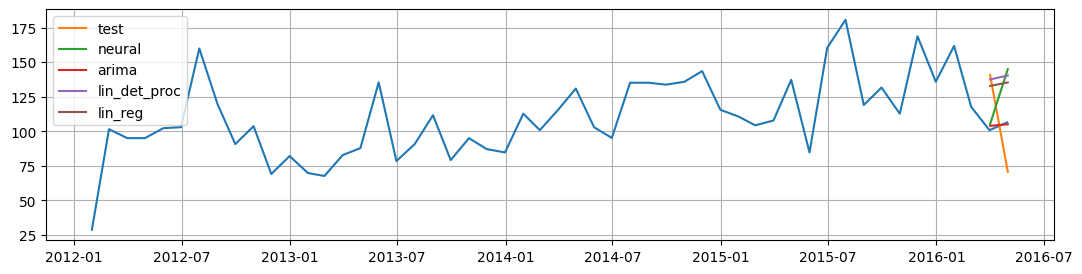

In [159]:

plt.figure(figsize=(13,3))
plt.plot(train.date_month, train.sales)#, label='tain')
plt.plot(test.date_month, test.sales, label='test')
plt.plot(test.date_month, y_pred_neural['RNN-median'], label='neural')
plt.plot(test.date_month, y_pred_arima, label='arima')
# plt.plot(test.date_month, y_pred_hw, label='ex_sm')
# # plt.plot(test.date_month, y_pred_hwl, label='log_ex_sm')
plt.plot(test.date_month, y_pred_ldp, label='lin_det_proc')
plt.plot(test.date_month, y_pred_lr, label='lin_reg')
# plt.plot(test.date_month, y_pred_wn, label='naive')

# plt.fill_between(test.date_month, y_pred_neural['RNN-lo-90'], y_pred_neural['RNN-hi-90'], alpha=0.1)
plt.grid()
plt.legend()

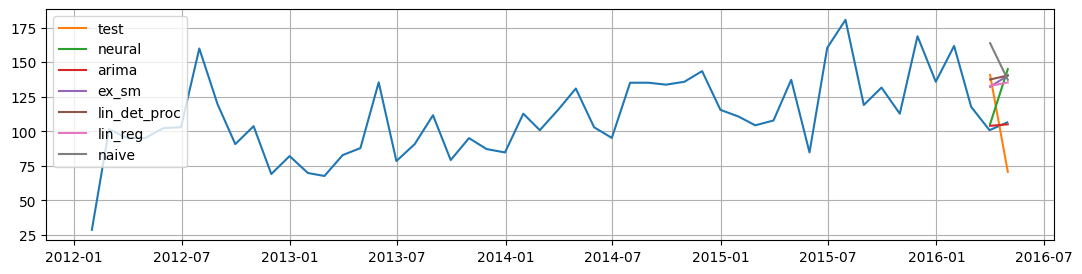

In [160]:
plt.figure(figsize=(13,3))
plt.plot(train.date_month, train.sales)#, label='tain')
plt.plot(test.date_month, df_test.sales, label='test')
plt.plot(test.date_month, y_pred_neural['RNN-median'], label='neural')
plt.plot(test.date_month, y_pred_arima, label='arima')
plt.plot(test.date_month, y_pred_hw, label='ex_sm')
# plt.plot(test.date_month, y_pred_hwl, label='log_ex_sm')
plt.plot(test.date_month, y_pred_ldp, label='lin_det_proc')
plt.plot(test.date_month, y_pred_lr, label='lin_reg')
plt.plot(test.date_month, y_pred_naive, label='naive')

plt.fill_between(test.date_month, y_pred_neural['RNN-lo-90'], y_pred_neural['RNN-hi-90'], alpha=0.1)
plt.grid()
plt.legend()

# Evaluation

In [206]:
y_pred = test['sales'][0]
y_pred
y_pred_hw.values[0]

np.float64(132.11319906545108)

In [221]:
desv, desv_perc = round(y_pred - y_pred_hw.values[0], 3),round(100*(y_pred - y_pred_hw.values[0])/y_pred,3)
print("Diference {} $USD, {} %".format(desv,desv_perc))



Diference 8.587 $USD, 6.103 %


In [191]:
type(y_pred_hw)
y_pred_naive = pd.Series(y_pred_naive)

In [210]:
y_pred_neural['RNN-median'][0]
y_pred_hw.values[0]
y_pred_lr.values[0]
y_pred_ldp.values[0]
y_pred_arima.values[0]
y_pred_naive.values[0]

y_pred = test['sales'].values[0]

In [219]:
round(y_pred - y_pred_lr.values[0], 3),round(100*(y_pred - y_pred_lr.values[0])/y_pred,3)
round(y_pred - y_pred_ldp.values[0], 3),round(100*(y_pred - y_pred_ldp.values[0])/y_pred,3)
round(y_pred - y_pred_arima.values[0], 3),round(100*(y_pred - y_pred_arima.values[0])/y_pred,3)

print("The model {} show a diference about {} $USD, {} %".format(prc,desv,desv_perc))




The model naive show a diference about -23.001 $USD, -16.348 %


In [252]:
proc = ['Neural RNN','Exponential Smoothing','Linear Regression','Linear Deterministic Process','ARIMA','naive']
alg = [y_pred_neural,y_pred_hw,y_pred_lr,y_pred_ldp,y_pred_arima,y_pred_naive]
dict_pr = dict()
c = []
for prc, y_p in zip(proc,alg):
    try:
        # print(prc, y_p['RNN-median'][0])
        desv, desv_perc = round(y_pred - y_p['RNN-median'][0], 3),round(100*(y_pred - y_p['RNN-median'][0])/y_pred,3)
        print("The model {} show a diference about {} $USD, {} %".format(prc,desv,desv_perc))
        c.append((float(desv), float(desv_perc), float(y_p['RNN-median'][0])))
    except:
        # print(prc, y_p.values[0])
        desv, desv_perc = round(y_pred - y_p.values[0], 3),round(100*(y_pred - y_p.values[0])/y_pred,3)
        print("The model {} show a diference about {} $USD, {} %".format(prc,desv,desv_perc))
        c.append((float(desv), float(desv_perc), float(y_p.values[0])))




The model Neural RNN show a diference about 35.508 $USD, 25.236 %
The model Exponential Smoothing show a diference about 8.587 $USD, 6.103 %
The model Linear Regression show a diference about 7.921 $USD, 5.629 %
The model Linear Deterministic Process show a diference about 3.272 $USD, 2.326 %
The model ARIMA show a diference about 36.756 $USD, 26.124 %
The model naive show a diference about -23.001 $USD, -16.348 %


In [253]:
dict(zip(proc,c))

{'Neural RNN': (35.508, 25.236, 105.19229125976562),
 'Exponential Smoothing': (8.587, 6.103, 132.11319906545108),
 'Linear Regression': (7.921, 5.629, 132.77937511152413),
 'Linear Deterministic Process': (3.272, 2.326, 137.4278125000003),
 'ARIMA': (36.756, 26.124, 103.94357301025265),
 'naive': (-23.001, -16.348, 163.70142200302976)}

In [254]:
df_prevision = pd.DataFrame(dict(zip(proc,c)), index=['$','%','predict']).T

In [255]:
df_prevision['real'] = float(y_pred)
df_prevision

,$,%,predict,real
Neural RNN,35.508,25.236,105.192291,140.7
Exponential Smoothing,8.587,6.103,132.113199,140.7
Linear Regression,7.921,5.629,132.779375,140.7
Linear Deterministic Process,3.272,2.326,137.427813,140.7
ARIMA,36.756,26.124,103.943573,140.7
naive,-23.001,-16.348,163.701422,140.7


In [256]:
hw_metrics

idx,h,mae,rmse,n
4,4.0,31.349133,36.694498,48.0
8,8.0,24.707043,28.241569,44.0
12,12.0,38.866555,41.969304,40.0
16,16.0,15.304355,17.031123,36.0
20,20.0,39.156220,41.311075,32.0
24,24.0,20.318933,25.825216,28.0
